## Capstone Project: Payment Patterns

**"Payment Patterns that fits their NEEDS"** <br>
Hypothesis 1: Recency, Frequecy and Monetary features of the previous payments affect the current approval <br>
Hypothesis 2: There are different clusters of customer segments in each RFM payment patterns <br>

Datasets to use: <br>
- previous
- application train and test
- POS Cash balance
- Installment balance
- Credit card balance

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Preparation

Check the availability of the data to test the *Hypothesis 1*

In [2]:
previous = pd.read_csv("previous_application.csv")
pd.set_option("max_columns", 150)
display(previous.head())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
current = pd.read_csv("application_train.csv")
# let's see the difference in their shape
print(current.shape, previous.shape)

(307511, 122) (1670214, 37)


In [4]:
pos = pd.read_csv("POS_CASH_balance.csv")
instal = pd.read_csv("installments_payments.csv")
cc = pd.read_csv("credit_card_balance.csv")

# let's see the difference in shape of the payments data
print(pos.shape, instal.shape, cc.shape)

(10001358, 8) (13605401, 8) (3840312, 23)


In [5]:
display(pos.head())
display(instal.head())
display(cc.head())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


Let us get the unique `SK_ID_PREV` and `SK_ID_CURR` values

In [6]:
pos_id = pos['SK_ID_PREV'].unique().tolist()
instal_id = instal['SK_ID_PREV'].unique().tolist()
cc_id = cc['SK_ID_PREV'].unique().tolist()

In [7]:
unique_id = list(set(pos_id + instal_id + cc_id))
print('Previous ID loans total to {}'.format(len(unique_id)))
type(unique_id)

Previous ID loans total to 1040969


list

In [8]:
pos_id = pos['SK_ID_CURR'].unique().tolist()
instal_id = instal['SK_ID_CURR'].unique().tolist()
cc_id = cc['SK_ID_CURR'].unique().tolist()

In [9]:
curr_unique_id = list(set(pos_id + instal_id + cc_id))
print('While, Current ID loans total to {}'.format(len(curr_unique_id)))
type(curr_unique_id)

While, Current ID loans total to 340365


list

Filter out the dataset that only has those unique `SK_ID_PREV` and `SK_ID_CURR` values with the necessary columns. Follow the specifications in the image for the features: <br>
https://www.notion.so/allmike/Eskwelabs-Capstone-Project-741710aaa0314fe9b7847f0b61ffefa8#59595b31bd46440390c555aa455a7b12

In [10]:
# Filter current dataset to include id and target variable
current_df = current.loc[current['SK_ID_CURR'].isin(curr_unique_id), ['SK_ID_CURR', 'TARGET']]
curr_unique_id = current_df['SK_ID_CURR']
current_df.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [11]:
# Filter pos dataset to include ID, MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS' and 'PAYMENT_TYPE' columns
pos_df = pos.loc[pos['SK_ID_CURR'].isin(curr_unique_id), 'SK_ID_CURR':'NAME_CONTRACT_STATUS']
pos_df.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS
0,182943,-31,48.0,45.0,Active
1,367990,-33,36.0,35.0,Active
2,397406,-32,12.0,9.0,Active
3,269225,-35,48.0,42.0,Active
4,334279,-35,36.0,35.0,Active


In [12]:
pos_df = pos_df.groupby(['SK_ID_CURR']).agg({
    'MONTHS_BALANCE': 'min',
    'CNT_INSTALMENT': 'max',
    'CNT_INSTALMENT_FUTURE': ['max', 'count'],
    'NAME_CONTRACT_STATUS': 'max'
})
pos_df.columns = ["_POS_".join(x) for x in pos_df.columns.ravel()]
pos_df.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max
SK_ID_CURR,,,,,
100002,-19,24.0,24.0,19,Active
100003,-77,12.0,12.0,28,Completed
100004,-27,4.0,4.0,4,Completed
100006,-20,48.0,48.0,20,Returned to the store
100007,-77,24.0,24.0,66,Signed


In [13]:
pos_df['POS_PAYMENT_TYPE'] = 1
pos_df = pos_df.reset_index()
pos_df['SK_ID_CURR_POS'] = pos_df['SK_ID_CURR']
pos_df = pos_df.drop(columns=['SK_ID_CURR'])

### Visualization for POS Cash Balance
Frequency vs Recency

In [14]:
pos_df.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max,POS_PAYMENT_TYPE,SK_ID_CURR_POS
0,-19,24.0,24.0,19,Active,1,100002
1,-77,12.0,12.0,28,Completed,1,100003
2,-27,4.0,4.0,4,Completed,1,100004
3,-20,48.0,48.0,20,Returned to the store,1,100006
4,-77,24.0,24.0,66,Signed,1,100007


In [15]:
pos_df.CNT_INSTALMENT_POS_max.mean()

20.426173035726627

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(-105, 90, 'The mean frequency of payments ranges from 19 to 22 for 100 to 20 months after\nthe credit however for the last 20 months the mean frequency decreases by almost 33%')

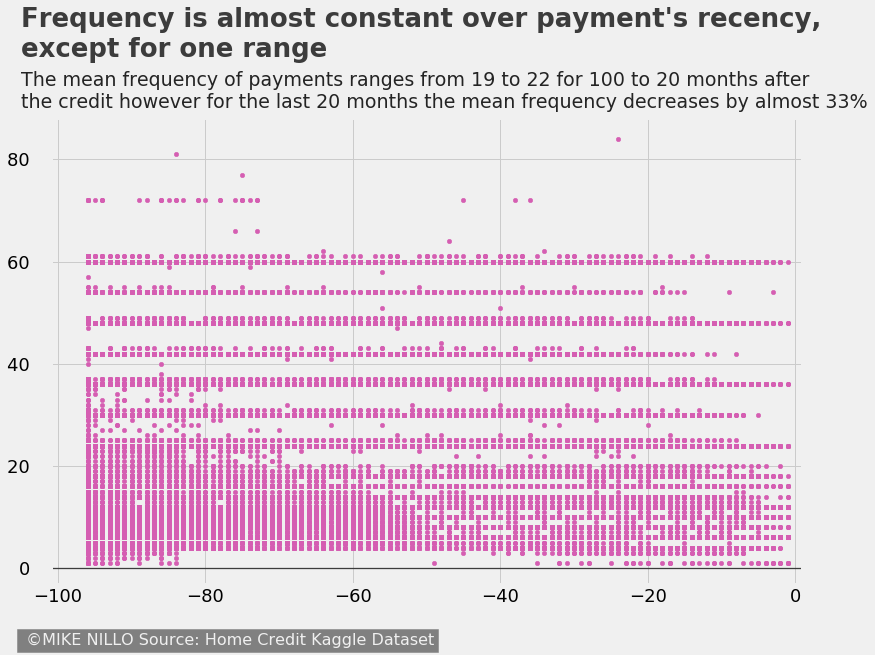

In [16]:
import matplotlib.style as style
style.use('fivethirtyeight')
freq_vs_rec = pos_df.plot(x = 'MONTHS_BALANCE_POS_min', y = 'CNT_INSTALMENT_POS_max', kind = 'scatter', figsize = (12,8), color= [213/255,94/255,178/255])
freq_vs_rec.tick_params(axis = 'both', which = 'major', labelsize = 18)
freq_vs_rec.set_yticklabels(labels = [-10, '0   ', '20   ', '40   ', '60   ', '80   '])
freq_vs_rec.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
freq_vs_rec.set_xlim(left = -101, right = 1)

freq_vs_rec.xaxis.label.set_visible(False)
freq_vs_rec.yaxis.label.set_visible(False)
freq_vs_rec.text(x = -105, y = -15,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
freq_vs_rec.text(x = -105, y = 100, s = "Frequency is almost constant over payment's recency,\nexcept for one range",
               fontsize = 26, weight = 'bold', alpha = .75)
freq_vs_rec.text(x = -105, y = 90,
               s = 'The mean frequency of payments ranges from 19 to 22 for 100 to 20 months after\nthe credit however for the last 20 months the mean frequency decreases by almost 33%',
              fontsize = 19, alpha = .85)

In [17]:
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-20, 0))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-40, -20))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-60, -40))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-80, -60))), 'CNT_INSTALMENT_POS_max'].mean())
print(pos_df.loc[pos_df['MONTHS_BALANCE_POS_min'].isin(list(range(-100, -80))), 'CNT_INSTALMENT_POS_max'].mean())

14.805981308411216
19.77082769059189
22.410657094340433
22.215265883906646
22.78155134046837


There are not so much relationship in this graph. So we can say that the even the payment dates become closer, the frequency of payments are still the same.

In [18]:
pos_df['difference'] = pos_df.CNT_INSTALMENT_FUTURE_POS_max - pos_df.CNT_INSTALMENT_POS_max
print(pos_df.loc[pos_df['CNT_INSTALMENT_POS_max'] < 36, 'difference'].mean())
print(pos_df.loc[pos_df['CNT_INSTALMENT_POS_max'] >= 36, 'difference'].mean())

-0.1218454208169138
-0.07594615649401236


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


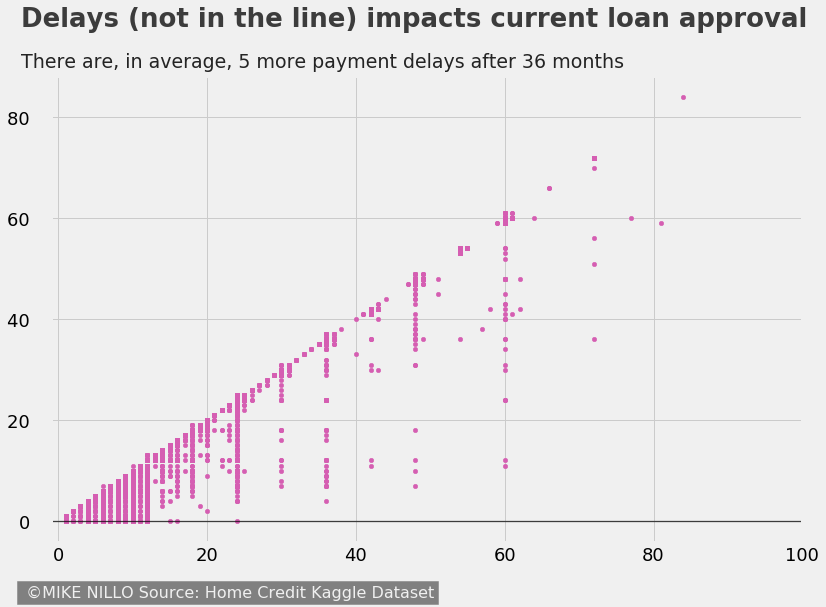

In [128]:
##### import matplotlib.style as style
style.use('fivethirtyeight')
freq_vs_rec = pos_df.plot(x = 'CNT_INSTALMENT_POS_max', y = 'CNT_INSTALMENT_FUTURE_POS_max', kind = 'scatter', figsize = (12,8), color= [213/255,94/255,178/255])
freq_vs_rec.tick_params(axis = 'both', which = 'major', labelsize = 18)
freq_vs_rec.set_yticklabels(labels = [-10, '0   ', '20   ', '40   ', '60   ', '80   '])
freq_vs_rec.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
freq_vs_rec.set_xlim(left = -1, right = 100)

freq_vs_rec.xaxis.label.set_visible(False)
freq_vs_rec.yaxis.label.set_visible(False)
freq_vs_rec.text(x = -5, y = -15,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
freq_vs_rec.text(x = -5, y = 98, s = "Delays (not in the line) impacts current loan approval",
               fontsize = 26, weight = 'bold', alpha = .75)
freq_vs_rec.text(x = -5, y = 90,
               s = 'There are, in average, 5 more payment delays after 36 months',
              fontsize = 19, alpha = .85)
plt.savefig('frequency_delay.png')

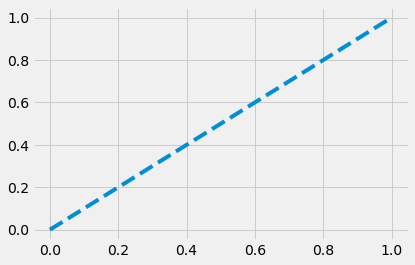

In [126]:
import matplotlib.pyplot as plt 
import numpy as np    

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

abline(1, 0)

In [20]:
# Filter instal dataset to include ID, MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS' and 'PAYMENT_TYPE' columns
instal_df = instal.loc[instal['SK_ID_CURR'].isin(curr_unique_id), 'SK_ID_CURR':'AMT_PAYMENT']
instal_df.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [21]:
instal_df = instal_df.groupby('SK_ID_CURR').agg({
    'DAYS_INSTALMENT': 'max',
    'DAYS_ENTRY_PAYMENT': 'max',
    'AMT_INSTALMENT': 'max',
    'AMT_PAYMENT': ['max', 'count']
})
instal_df.columns = ["_INST_".join(x) for x in instal_df.columns.ravel()]
instal_df.head()

,DAYS_INSTALMENT_INST_max,DAYS_ENTRY_PAYMENT_INST_max,AMT_INSTALMENT_INST_max,AMT_PAYMENT_INST_max,AMT_PAYMENT_INST_count
SK_ID_CURR,,,,,
100002,-25.0,-49.0,53093.745,53093.745,19
100003,-536.0,-544.0,560835.360,560835.360,25
100004,-724.0,-727.0,10573.965,10573.965,3
100006,-11.0,-12.0,691786.890,691786.890,16
100007,-14.0,-14.0,22678.785,22678.785,66


In [22]:
instal_df['INST_PAYMENT_TYPE'] = 1
instal_df = instal_df.reset_index()
instal_df['SK_ID_CURR_INST'] = instal_df['SK_ID_CURR']
instal_df = instal_df.drop(columns=['SK_ID_CURR'])

### Visualization for Installment Cash Balance
Recency vs Monetary

In [23]:
instal_df = instal_df.dropna()

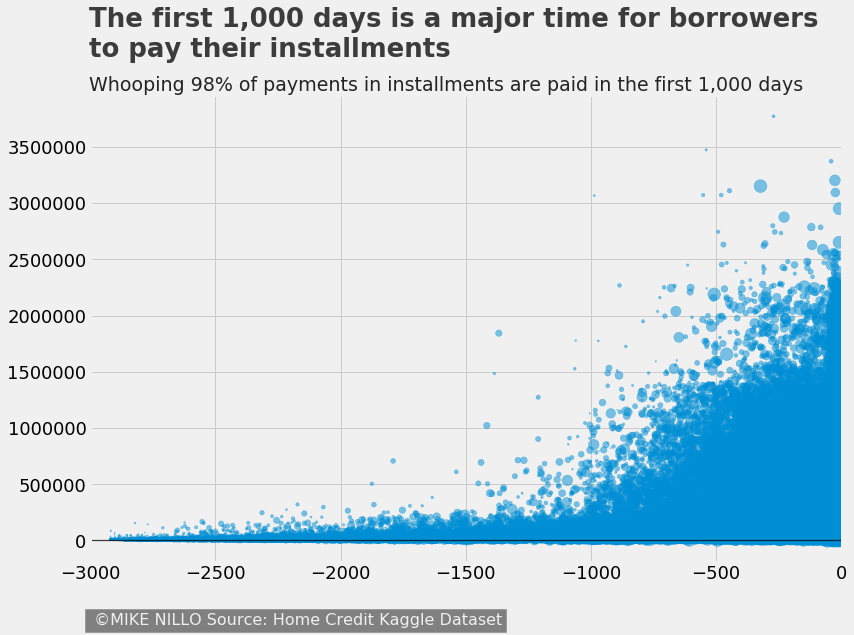

In [123]:
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.scatter(x = instal_df['DAYS_INSTALMENT_INST_max'], y = instal_df['AMT_INSTALMENT_INST_max'], s=instal_df['AMT_PAYMENT_INST_count'], alpha=0.5)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#plt.yticks(labels = [-10, '1 Million   ', '2 Million   ', '3 Million   '])
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = -3001, right = 1)

#plt.xaxis.label.set_visible(False)
#freq_vs_rec.yaxis.label.set_visible(False)
plt.text(x = -3005, y = -750000,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = -3005, y = 4300000, s = "The first 1,000 days is a major time for borrowers\nto pay their installments ",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -3005, y = 4000000,
               s = 'Whooping 98% of payments in installments are paid in the first 1,000 days',
              fontsize = 19, alpha = .85)
plt.savefig('recency_blue.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


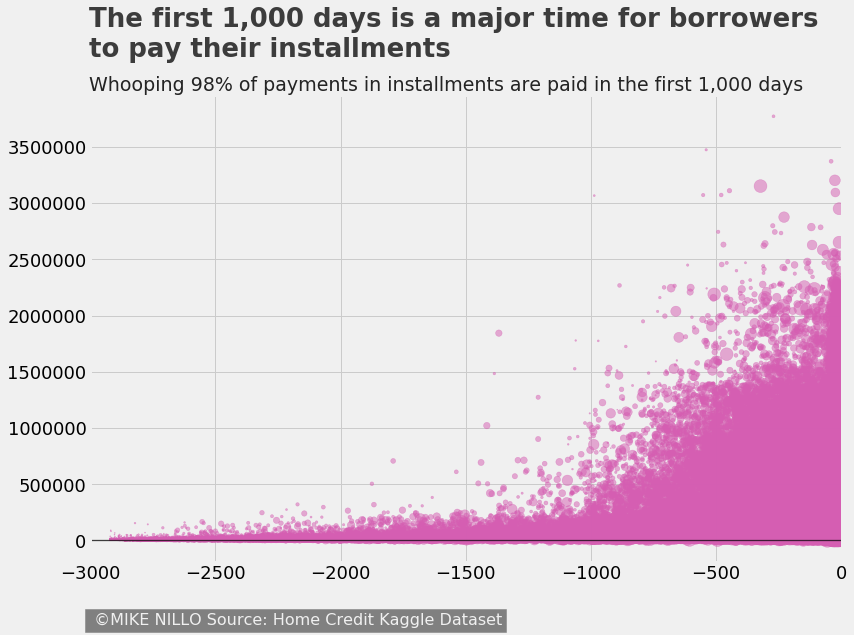

In [124]:
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.scatter(x = instal_df['DAYS_INSTALMENT_INST_max'], y = instal_df['AMT_INSTALMENT_INST_max'], s=instal_df['AMT_PAYMENT_INST_count'], alpha=0.5, c=[213/255,94/255,178/255])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#plt.yticks(labels = [-10, '1 Million   ', '2 Million   ', '3 Million   '])
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = -3001, right = 1)

#plt.xaxis.label.set_visible(False)
#freq_vs_rec.yaxis.label.set_visible(False)
plt.text(x = -3005, y = -750000,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = -3005, y = 4300000, s = "The first 1,000 days is a major time for borrowers\nto pay their installments ",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -3005, y = 4000000,
               s = 'Whooping 98% of payments in installments are paid in the first 1,000 days',
              fontsize = 19, alpha = .85)
plt.savefig('recency_pink.png')

I can infer that most of the borrowers try to pay most of the loan in the first 1,000 days

In [25]:
a = instal_df.loc[instal_df['DAYS_INSTALMENT_INST_max']>-1000, 'AMT_INSTALMENT_INST_max'].sum()

In [26]:
b = instal_df.loc[instal_df['DAYS_INSTALMENT_INST_max']<-1000, 'AMT_INSTALMENT_INST_max'].sum()

In [27]:
round(a/(a+b), 2)

0.98

In [28]:
# Filter cc dataset to include ID, MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS' and 'PAYMENT_TYPE' columns
cc_df = cc.loc[cc['SK_ID_CURR'].isin(curr_unique_id), 'SK_ID_CURR':'NAME_CONTRACT_STATUS']
cc_df.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS
1,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.00,2250.000,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active
3,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.76,11925.000,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active
4,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.89,27000.000,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active
8,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.50,4093.515,4093.515,285376.410,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active
9,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.34,45000.000,45000.000,192793.275,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active


In [29]:
cc_df = cc_df.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': 'max',
    'AMT_CREDIT_LIMIT_ACTUAL': 'mean',
    'AMT_DRAWINGS_CURRENT': ['mean', 'count'],
    'AMT_DRAWINGS_OTHER_CURRENT': ['mean', 'count'],
    'AMT_INST_MIN_REGULARITY': 'max',
    'AMT_PAYMENT_TOTAL_CURRENT': 'mean',
    'AMT_TOTAL_RECEIVABLE': 'mean',
    'CNT_DRAWINGS_CURRENT': 'mean',
    'CNT_DRAWINGS_OTHER_CURRENT': 'mean',
})
cc_df.columns = ["_CC_".join(x) for x in cc_df.columns.ravel()]
cc_df.head()

,AMT_BALANCE_CC_max,AMT_CREDIT_LIMIT_ACTUAL_CC_mean,AMT_DRAWINGS_CURRENT_CC_mean,AMT_DRAWINGS_CURRENT_CC_count,AMT_DRAWINGS_OTHER_CURRENT_CC_mean,AMT_DRAWINGS_OTHER_CURRENT_CC_count,AMT_INST_MIN_REGULARITY_CC_max,AMT_PAYMENT_TOTAL_CURRENT_CC_mean,AMT_TOTAL_RECEIVABLE_CC_mean,CNT_DRAWINGS_CURRENT_CC_mean,CNT_DRAWINGS_OTHER_CURRENT_CC_mean
SK_ID_CURR,,,,,,,,,,,
100006,0.0,270000.000000,0.000000,6,NaN,0,0.0,0.000000,0.000000,0.000000,NaN
100011,189000.0,164189.189189,2432.432432,74,0.0,74,9000.0,4520.067568,54433.179122,0.054054,0.0
100021,0.0,675000.000000,0.000000,17,NaN,0,0.0,0.000000,0.000000,0.000000,NaN
100023,0.0,135000.000000,0.000000,8,NaN,0,0.0,0.000000,0.000000,0.000000,NaN
100036,0.0,78750.000000,0.000000,12,NaN,0,0.0,0.000000,0.000000,0.000000,NaN


In [30]:
cc_df['CC_PAYMENT_TYPE'] = 1
cc_df = cc_df.reset_index()
cc_df['SK_ID_CURR_CC'] = cc_df['SK_ID_CURR']
cc_df = cc_df.drop(columns=['SK_ID_CURR'])

### Visualization for Credit Card Cash Balance
Frequency vs Monetary

Text(-5, 1200000, 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970')

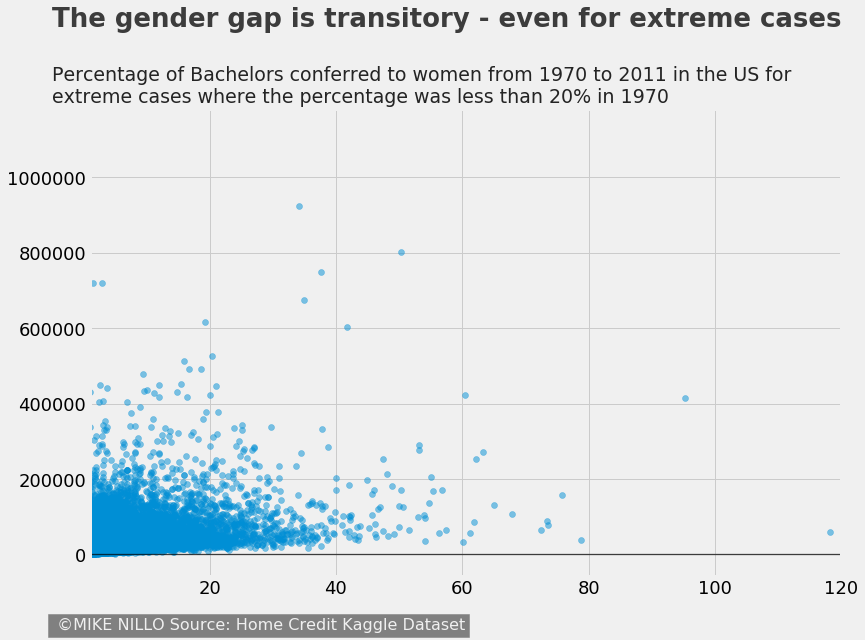

In [31]:
import matplotlib.style as style
style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.scatter(x = cc_df['CNT_DRAWINGS_CURRENT_CC_mean'], y = cc_df['AMT_DRAWINGS_CURRENT_CC_mean'], alpha=0.5)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#plt.yticks(labels = [-10, '1 Million   ', '2 Million   ', '3 Million   '])
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlim(left = 1, right = 120)

#plt.xaxis.label.set_visible(False)
#freq_vs_rec.yaxis.label.set_visible(False)
plt.text(x = -5, y = -200000,
    s = ' ©MIKE NILLO Source: Home Credit Kaggle Dataset',fontsize = 16, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
plt.text(x = -5, y = 1400000, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -5, y = 1200000,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)

## Data Cleaning
Merge the datasets and drop null values so we can proceed into machine learning

In [238]:
final_df = pd.concat([pos_df, instal_df, cc_df, current_df], axis=1, join='inner')
print(len(final_df))

82618


In [239]:
print(len(final_df.SK_ID_CURR_POS.unique()))
print(len(final_df.SK_ID_CURR_INST.unique()))
print(len(final_df.SK_ID_CURR_CC.unique()))

82618
82618
82618


In [240]:
final_df.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max,POS_PAYMENT_TYPE,SK_ID_CURR_POS,difference,DAYS_INSTALMENT_INST_max,DAYS_ENTRY_PAYMENT_INST_max,AMT_INSTALMENT_INST_max,AMT_PAYMENT_INST_max,AMT_PAYMENT_INST_count,INST_PAYMENT_TYPE,SK_ID_CURR_INST,AMT_BALANCE_CC_max,AMT_CREDIT_LIMIT_ACTUAL_CC_mean,AMT_DRAWINGS_CURRENT_CC_mean,AMT_DRAWINGS_CURRENT_CC_count,AMT_DRAWINGS_OTHER_CURRENT_CC_mean,AMT_DRAWINGS_OTHER_CURRENT_CC_count,AMT_INST_MIN_REGULARITY_CC_max,AMT_PAYMENT_TOTAL_CURRENT_CC_mean,AMT_TOTAL_RECEIVABLE_CC_mean,CNT_DRAWINGS_CURRENT_CC_mean,CNT_DRAWINGS_OTHER_CURRENT_CC_mean,CC_PAYMENT_TYPE,SK_ID_CURR_CC,SK_ID_CURR,TARGET
0,-19,24.0,24.0,19,Active,1,100002,0.0,-25.0,-49.0,53093.745,53093.745,19,1,100002,0.0,270000.000000,0.000000,6,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100006,100002,1
1,-77,12.0,12.0,28,Completed,1,100003,0.0,-536.0,-544.0,560835.360,560835.360,25,1,100003,189000.0,164189.189189,2432.432432,74,0.0,74,9000.0,4520.067568,54433.179122,0.054054,0.0,1,100011,100003,0
2,-27,4.0,4.0,4,Completed,1,100004,0.0,-724.0,-727.0,10573.965,10573.965,3,1,100004,0.0,675000.000000,0.000000,17,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100021,100004,0
3,-20,48.0,48.0,20,Returned to the store,1,100006,0.0,-11.0,-12.0,691786.890,691786.890,16,1,100006,0.0,135000.000000,0.000000,8,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100023,100006,0
4,-77,24.0,24.0,66,Signed,1,100007,0.0,-14.0,-14.0,22678.785,22678.785,66,1,100007,0.0,78750.000000,0.000000,12,NaN,0,0.0,0.000000,0.000000,0.000000,NaN,1,100036,100007,0


In [241]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82618 entries, 0 to 86904
Data columns (total 30 columns):
MONTHS_BALANCE_POS_min                 82618 non-null int64
CNT_INSTALMENT_POS_max                 82609 non-null float64
CNT_INSTALMENT_FUTURE_POS_max          82609 non-null float64
CNT_INSTALMENT_FUTURE_POS_count        82618 non-null int64
NAME_CONTRACT_STATUS_POS_max           82618 non-null object
POS_PAYMENT_TYPE                       82618 non-null int64
SK_ID_CURR_POS                         82618 non-null int64
difference                             82609 non-null float64
DAYS_INSTALMENT_INST_max               82618 non-null float64
DAYS_ENTRY_PAYMENT_INST_max            82618 non-null float64
AMT_INSTALMENT_INST_max                82618 non-null float64
AMT_PAYMENT_INST_max                   82618 non-null float64
AMT_PAYMENT_INST_count                 82618 non-null int64
INST_PAYMENT_TYPE                      82618 non-null int64
SK_ID_CURR_INST                     

In [242]:
final_df = final_df.drop(columns=['SK_ID_CURR_POS', 'SK_ID_CURR_INST', 'SK_ID_CURR_CC', 'AMT_DRAWINGS_OTHER_CURRENT_CC_mean', 'CNT_DRAWINGS_OTHER_CURRENT_CC_mean'])

In [243]:
y = final_df.TARGET
X = final_df.iloc[:, final_df.columns != 'TARGET']
X = X.iloc[:, X.columns != 'SK_ID_CURR']

In [244]:
X.isnull().sum()

MONTHS_BALANCE_POS_min                 0
CNT_INSTALMENT_POS_max                 9
CNT_INSTALMENT_FUTURE_POS_max          9
CNT_INSTALMENT_FUTURE_POS_count        0
NAME_CONTRACT_STATUS_POS_max           0
POS_PAYMENT_TYPE                       0
difference                             9
DAYS_INSTALMENT_INST_max               0
DAYS_ENTRY_PAYMENT_INST_max            0
AMT_INSTALMENT_INST_max                0
AMT_PAYMENT_INST_max                   0
AMT_PAYMENT_INST_count                 0
INST_PAYMENT_TYPE                      0
AMT_BALANCE_CC_max                     0
AMT_CREDIT_LIMIT_ACTUAL_CC_mean        0
AMT_DRAWINGS_CURRENT_CC_mean           0
AMT_DRAWINGS_CURRENT_CC_count          0
AMT_DRAWINGS_OTHER_CURRENT_CC_count    0
AMT_INST_MIN_REGULARITY_CC_max         0
AMT_PAYMENT_TOTAL_CURRENT_CC_mean      0
AMT_TOTAL_RECEIVABLE_CC_mean           0
CNT_DRAWINGS_CURRENT_CC_mean           0
CC_PAYMENT_TYPE                        0
dtype: int64

In [247]:
X.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max,POS_PAYMENT_TYPE,difference,DAYS_INSTALMENT_INST_max,DAYS_ENTRY_PAYMENT_INST_max,AMT_INSTALMENT_INST_max,AMT_PAYMENT_INST_max,AMT_PAYMENT_INST_count,INST_PAYMENT_TYPE,AMT_BALANCE_CC_max,AMT_CREDIT_LIMIT_ACTUAL_CC_mean,AMT_DRAWINGS_CURRENT_CC_mean,AMT_DRAWINGS_CURRENT_CC_count,AMT_DRAWINGS_OTHER_CURRENT_CC_count,AMT_INST_MIN_REGULARITY_CC_max,AMT_PAYMENT_TOTAL_CURRENT_CC_mean,AMT_TOTAL_RECEIVABLE_CC_mean,CNT_DRAWINGS_CURRENT_CC_mean,CC_PAYMENT_TYPE
0,-19,24.0,24.0,19,0,1,0.0,-25.0,-49.0,53093.745,53093.745,19,1,0.0,270000.000000,0.000000,6,0,0.0,0.000000,0.000000,0.000000,1
1,-77,12.0,12.0,28,0,1,0.0,-536.0,-544.0,560835.360,560835.360,25,1,189000.0,164189.189189,2432.432432,74,74,9000.0,4520.067568,54433.179122,0.054054,1
2,-27,4.0,4.0,4,0,1,0.0,-724.0,-727.0,10573.965,10573.965,3,1,0.0,675000.000000,0.000000,17,0,0.0,0.000000,0.000000,0.000000,1
3,-20,48.0,48.0,20,0,1,0.0,-11.0,-12.0,691786.890,691786.890,16,1,0.0,135000.000000,0.000000,8,0,0.0,0.000000,0.000000,0.000000,1
4,-77,24.0,24.0,66,0,1,0.0,-14.0,-14.0,22678.785,22678.785,66,1,0.0,78750.000000,0.000000,12,0,0.0,0.000000,0.000000,0.000000,1


In [248]:
from sklearn.preprocessing import label_binarize
X['NAME_CONTRACT_STATUS_POS_max'] = label_binarize(X['NAME_CONTRACT_STATUS_POS_max'], classes=[0, 1, 2, 3, 4, 5, 6])

In [249]:
from sklearn.impute import SimpleImputer
# use for loop for SimpleImputer
cols = ['CNT_INSTALMENT_POS_max', 'CNT_INSTALMENT_FUTURE_POS_max', 'DAYS_ENTRY_PAYMENT_INST_max', 'AMT_PAYMENT_INST_max']

for col in cols:
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(X[[col]])

    imp_mean.transform(X[[col]])
    X[col] = imp_mean.transform(X[[col]]).flatten()
    print(col)

CNT_INSTALMENT_POS_max
CNT_INSTALMENT_FUTURE_POS_max
DAYS_ENTRY_PAYMENT_INST_max
AMT_PAYMENT_INST_max


Balancing the imbalanced datasets

In [250]:
X = X.drop(columns=['difference'])

In [251]:
# Oversample the minority data
#!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27,ratio = 1)
X_res, y_res = sm.fit_sample(X, y)
#print(pd.DataFrame(y).groupby('td').agg({'td':'count'}))
print('Minority used to be: ', y.mean(),' of ' ,y.count() )
print('Minority now composes: ', y_res.mean(),' of ' ,len(y_res))

Minority used to be:  0.08211285676244887  of  82618
Minority now composes:  0.5  of  151668


## Machine Learning - Supervised
I will use Logistic Regression, RandomForest and XGBoost to test my first hypothesis. <br>
Note that I did not prepared any optimization or parameter tuning in this iteration. <br>

What I would like to include for the next iteration is:
1. More logical feature engineering that reflects the payment patterns (RFM, cohorts/segments, groupby aggrefation function)
2. Balancing the dataset
3. Transforming and normalizing the dataset according to the assumptions of the algoerithms that I will use
4. Cross validation and parameter tuning for the machine learning algorithms

In [252]:
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.DataFrame(y_res)

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 0)

In [254]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)
accuracy_score(y_test, y_pred)

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5173073119272104

In [255]:
y_pred = y_pred.ravel()

In [256]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.5197003656954111
0.5755062050947093
0.5461815026035209


In [49]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, y_pred)
print(cm)
cm.print_stats()

TypeError: 'int' object is not iterable

In [49]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=model_logreg, X=X_train, y=y_train, cv=5) 

print(all_accuracies)
print(all_accuracies.mean())

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mike/anaconda3/lib/python3.7

[0.50962212 0.52083076 0.51563852 0.50941608 0.51125031]
0.5133515576734584


In [50]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train, y_train)
y_pred = model_randomforest.predict(X_test)
accuracy_score(y_test, y_pred)

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.9255620755587789

In [51]:
# !pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_randomforest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2108 ± 0.0044,CNT_INSTALMENT_POS_max
0.1922 ± 0.0036,CNT_INSTALMENT_FUTURE_POS_max
0.0333 ± 0.0005,DAYS_INSTALMENT_INST_max
0.0315 ± 0.0012,MONTHS_BALANCE_POS_min
0.0266 ± 0.0006,CNT_INSTALMENT_FUTURE_POS_count
0.0248 ± 0.0011,AMT_PAYMENT_INST_count
0.0217 ± 0.0009,AMT_DRAWINGS_CURRENT_CC_count
0.0197 ± 0.0009,DAYS_ENTRY_PAYMENT_INST_max
0.0174 ± 0.0013,AMT_CREDIT_LIMIT_ACTUAL_CC_mean
0.0156 ± 0.0012,AMT_PAYMENT_INST_max


In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9769770501388686
0.8730894839973873
0.9221164459161149


In [53]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [54]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=model_randomforest, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarni

[0.91803684 0.91107265 0.91816046 0.91589401 0.91593176]
0.9158191447789704


In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [57]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [59]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1,
                                   cv=skf.split(X_train, y_train), verbose=3, random_state=42)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.6min finished
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f1bf0625138>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=None,
                                           objec...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn',

In [60]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [61]:
random_search.best_score_

0.9452488024986163

## Machine Learning - Unsupervised

I will use KMeans Clustering, Agglomerative Clustering and DBScan, but for now I will only use KMeans Clustering. <br>
I also would like to use elbow criterion, silhouette score and PCA.

In [59]:
cols = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
X = current[cols]
y = current['TARGET']

/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


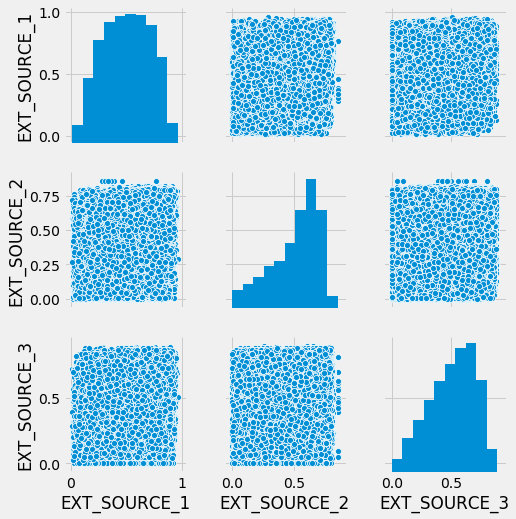

In [60]:
sns.pairplot(X)

In [61]:
label_X = X.select_dtypes(include=['object'])
int_X = X.select_dtypes(exclude=['object'])

In [62]:
label_X.head()

,CODE_GENDER,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Working,Single / not married,House / apartment,Laborers
1,F,State servant,Married,House / apartment,Core staff
2,M,Working,Single / not married,House / apartment,Laborers
3,F,Working,Civil marriage,House / apartment,Laborers
4,M,Working,Single / not married,House / apartment,Core staff


In [63]:
cols = label_X.columns.tolist()
label_X = pd.get_dummies(label_X, columns=cols)

In [64]:
X = pd.concat([label_X, int_X], axis=1)

In [65]:
#sns.pairplot(X)

In [66]:
X.isnull().sum()

CODE_GENDER_F                                   0
CODE_GENDER_M                                   0
CODE_GENDER_XNA                                 0
NAME_INCOME_TYPE_Businessman                    0
NAME_INCOME_TYPE_Commercial associate           0
NAME_INCOME_TYPE_Maternity leave                0
NAME_INCOME_TYPE_Pensioner                      0
NAME_INCOME_TYPE_State servant                  0
NAME_INCOME_TYPE_Student                        0
NAME_INCOME_TYPE_Unemployed                     0
NAME_INCOME_TYPE_Working                        0
NAME_FAMILY_STATUS_Civil marriage               0
NAME_FAMILY_STATUS_Married                      0
NAME_FAMILY_STATUS_Separated                    0
NAME_FAMILY_STATUS_Single / not married         0
NAME_FAMILY_STATUS_Unknown                      0
NAME_FAMILY_STATUS_Widow                        0
NAME_HOUSING_TYPE_Co-op apartment               0
NAME_HOUSING_TYPE_House / apartment             0
NAME_HOUSING_TYPE_Municipal apartment           0


In [67]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X[['EXT_SOURCE_1']])

imp_mean.transform(X[['EXT_SOURCE_1']])
X['EXT_SOURCE_1'] = imp_mean.transform(X[['EXT_SOURCE_1']]).flatten()

In [68]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X[['EXT_SOURCE_2']])
X['EXT_SOURCE_2'] = imp_mean.transform(X[['EXT_SOURCE_2']]).flatten()

In [69]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X[['EXT_SOURCE_3']])

X['EXT_SOURCE_3'] = imp_mean.transform(X[['EXT_SOURCE_3']]).flatten()

In [70]:
from sklearn.impute import SimpleImputer
# use for loop for SimpleImputer
cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for col in cols:
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(X[[col]])

    imp_mean.transform(X[[col]])
    X[col] = imp_mean.transform(X[[col]]).flatten()
    print(col)

EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3


/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mike/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


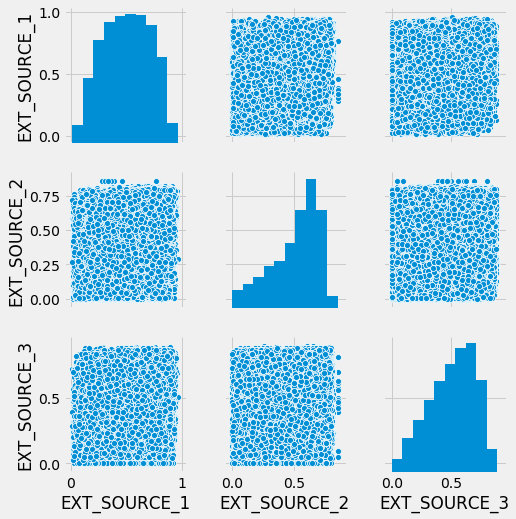

In [71]:
sns.pairplot(int_X)

In [72]:
from sklearn.preprocessing import Normalizer
int_X = transformer = Normalizer().fit_transform(X[cols])

int_X = pd.DataFrame(int_X, columns=cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

X = pd.concat([label_X, pd.DataFrame(scaled_data, columns=cols)], axis=1)

In [73]:
int_X = pd.DataFrame(int_X, columns=cols)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

In [75]:
X = pd.concat([label_X, pd.DataFrame(scaled_data, columns=cols)], axis=1)

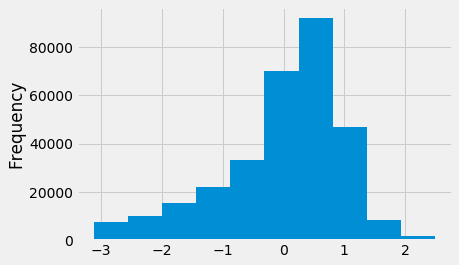

In [76]:
X['EXT_SOURCE_2'].plot(kind='hist')

In [76]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [79]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean = KMeans(i)
    kmean.fit(scaled_data)
    cost.append(kmean.inertia_) 

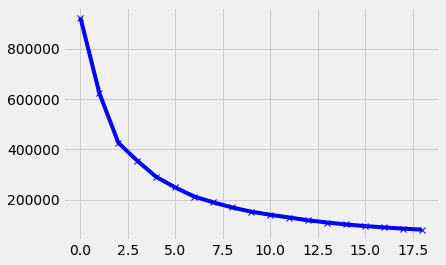

In [80]:
plt.plot(cost, 'bx-')

In [81]:
len(X.columns.tolist())

44

In [82]:
kmeans = KMeans(4, random_state=22)
kmeans.fit(scaled_data)
labels = kmeans.labels_
df2 = X.copy()
df2['cluster'] = labels

/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


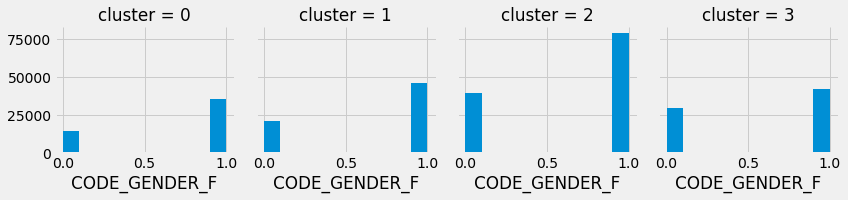

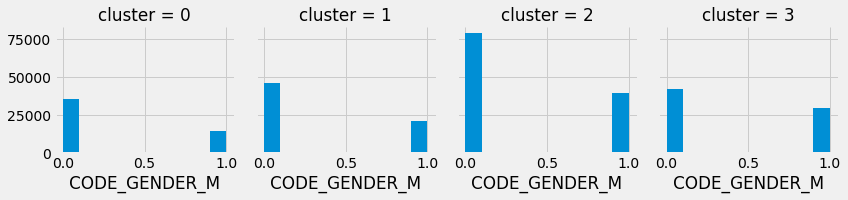

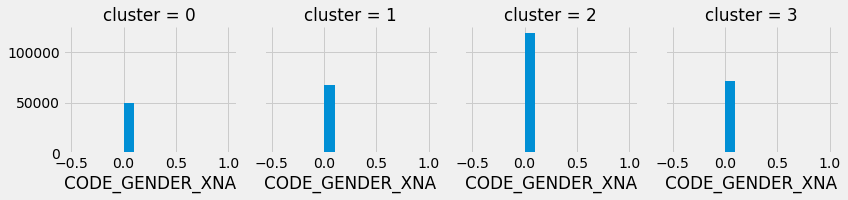

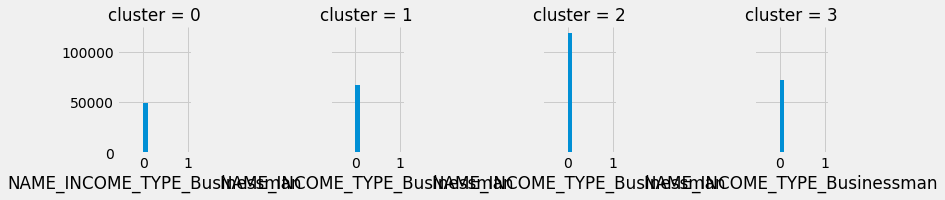

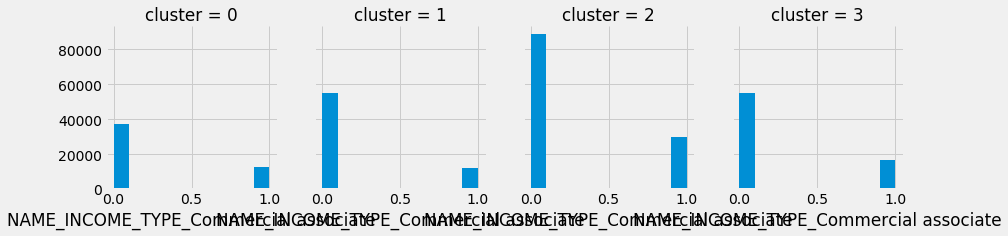

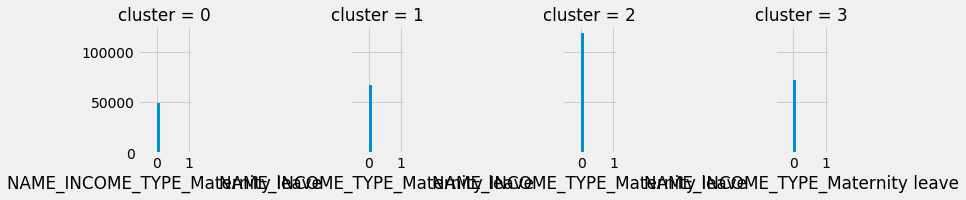

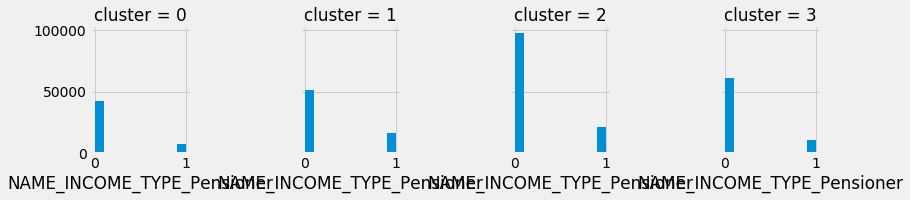

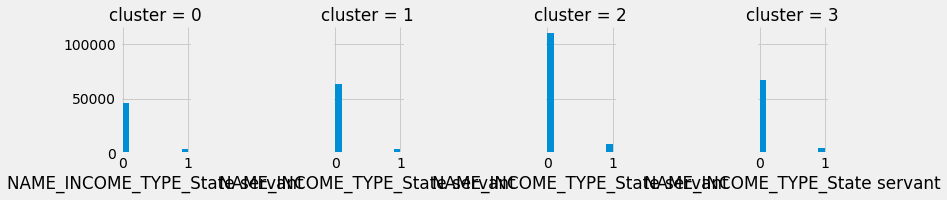

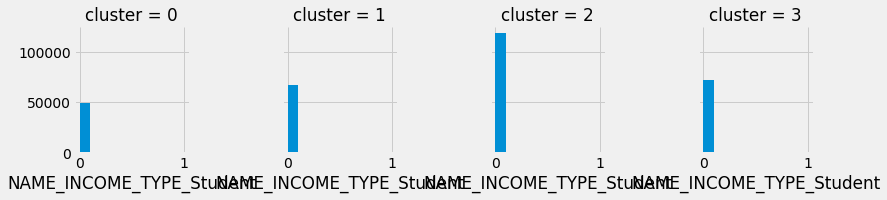

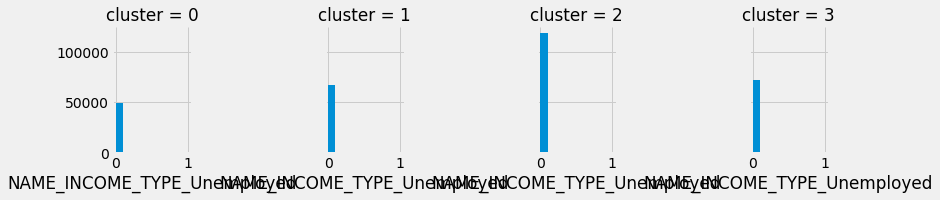

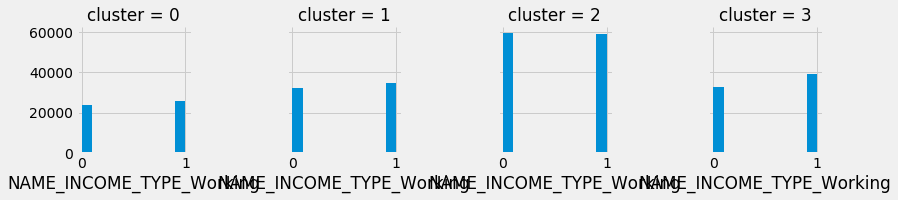

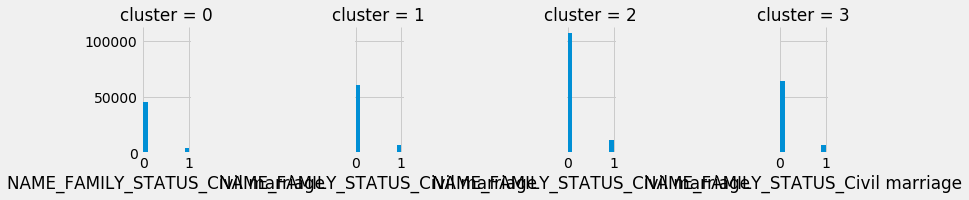

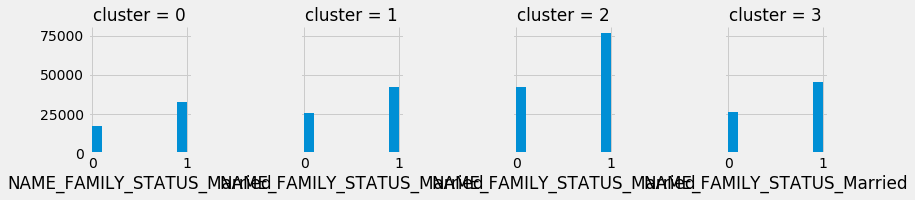

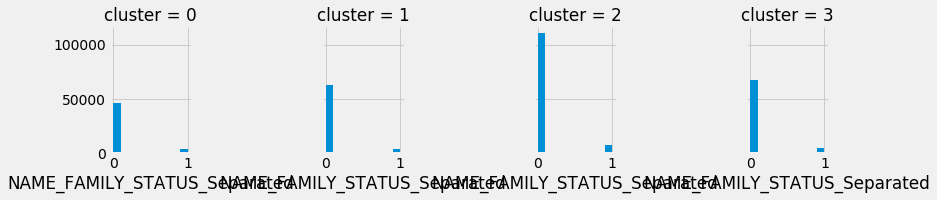

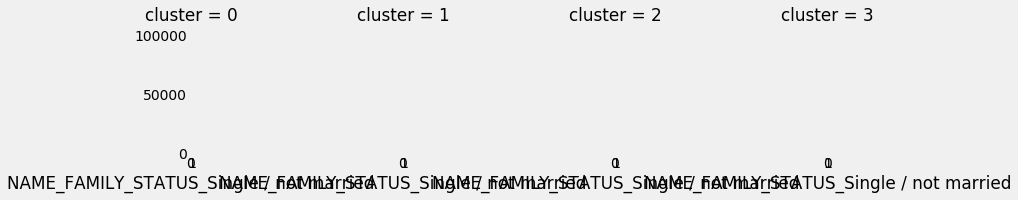

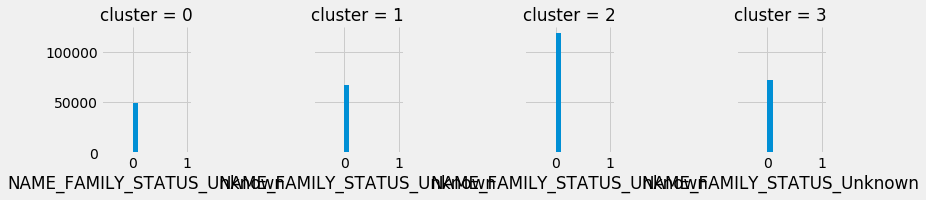

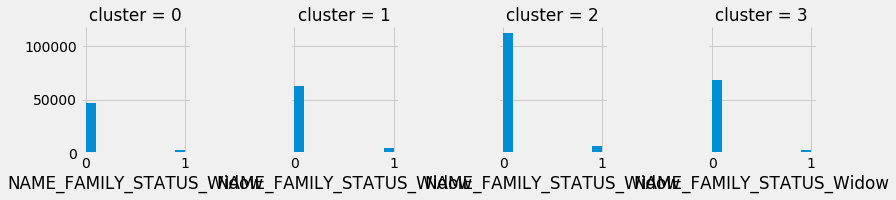

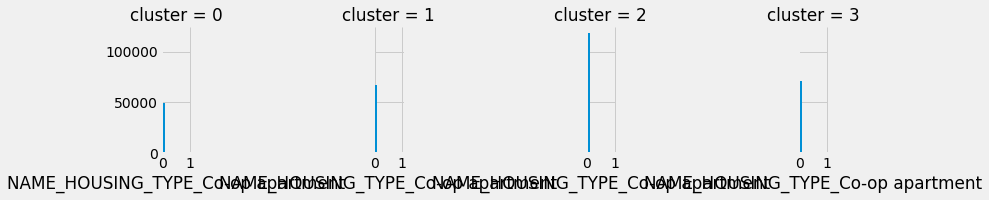

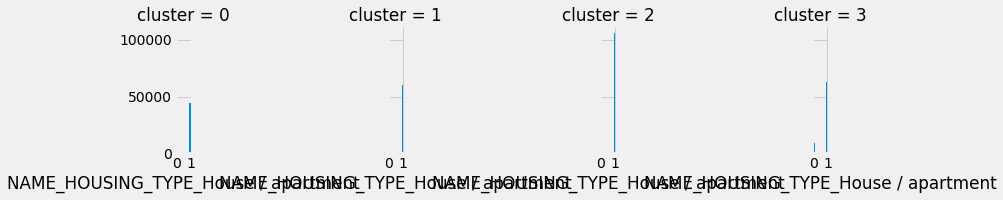

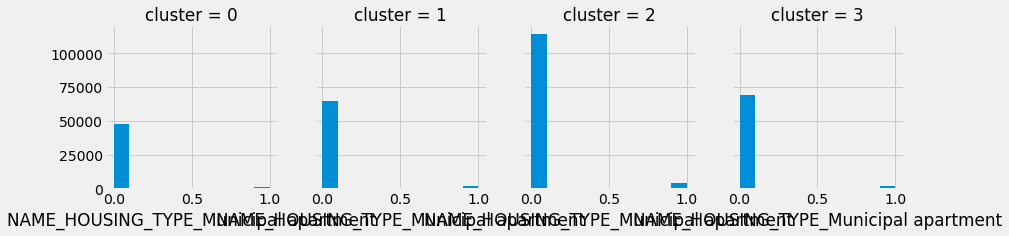

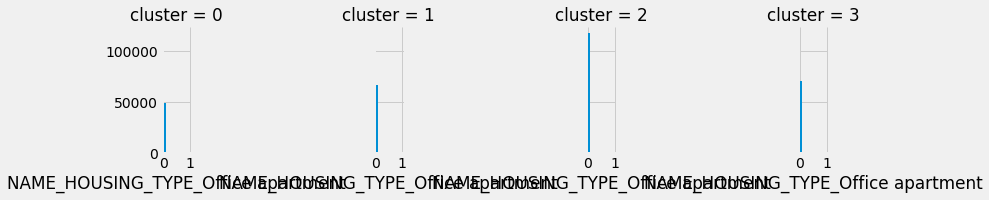

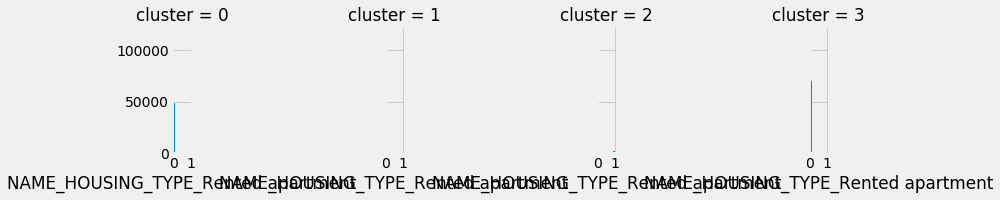

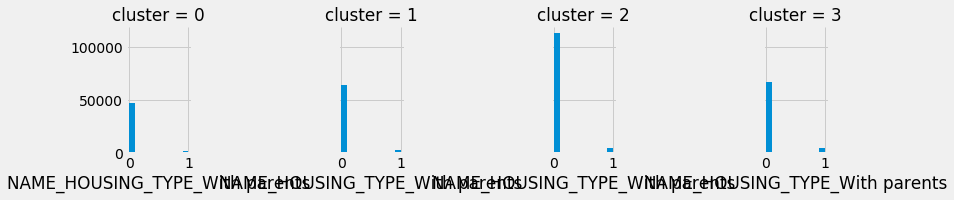

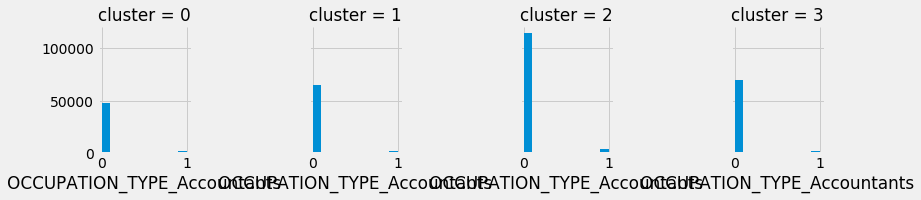

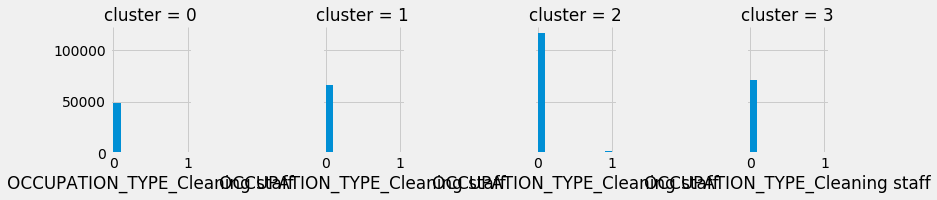

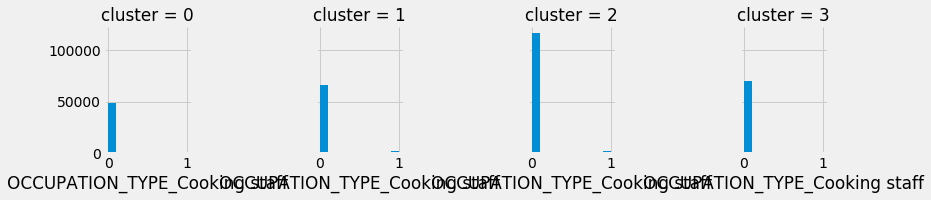

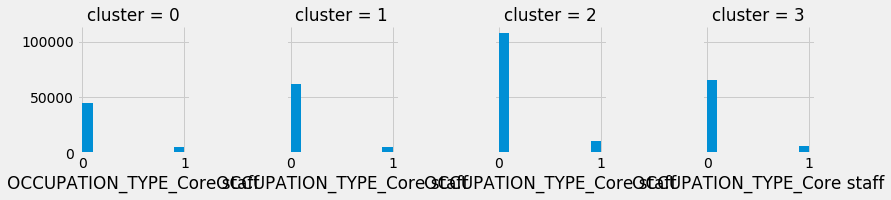

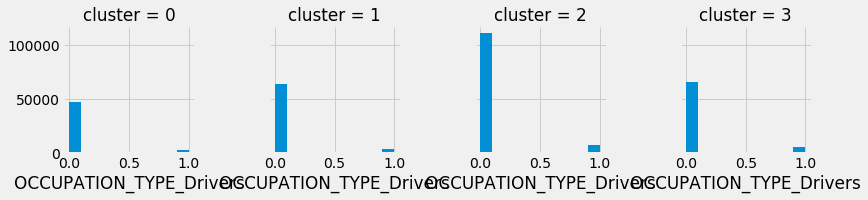

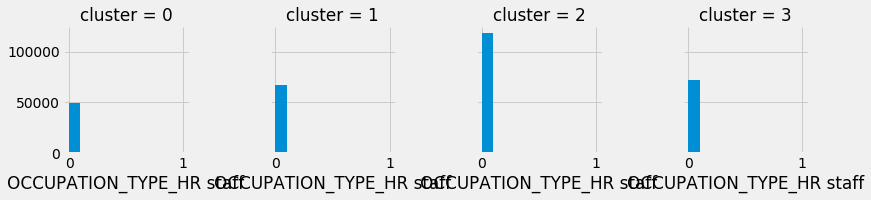

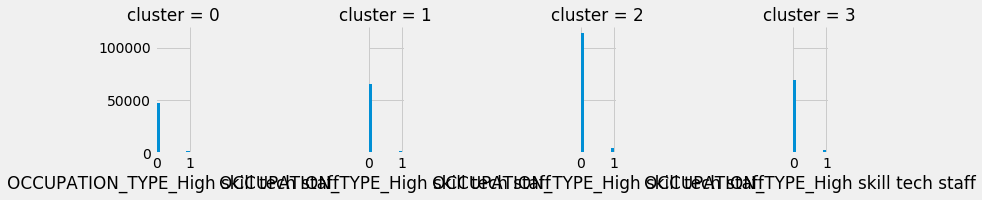

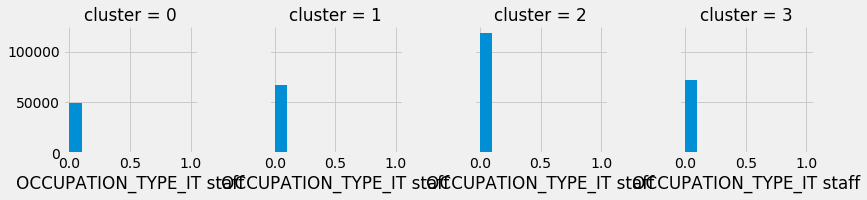

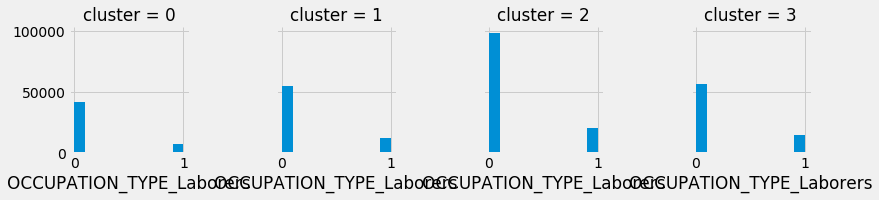

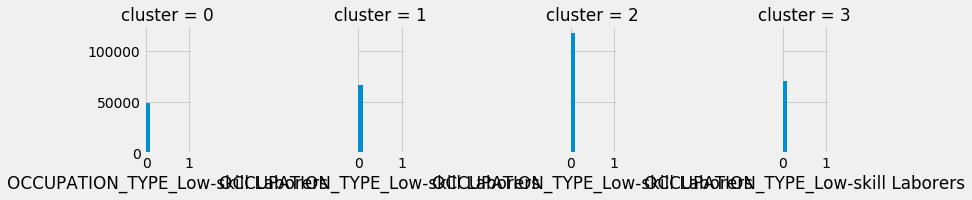

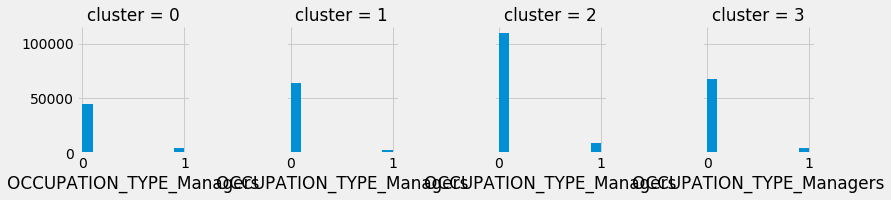

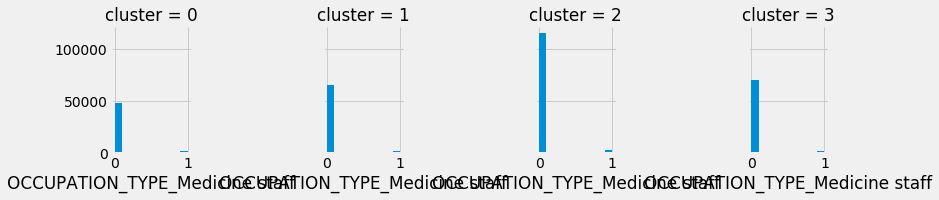

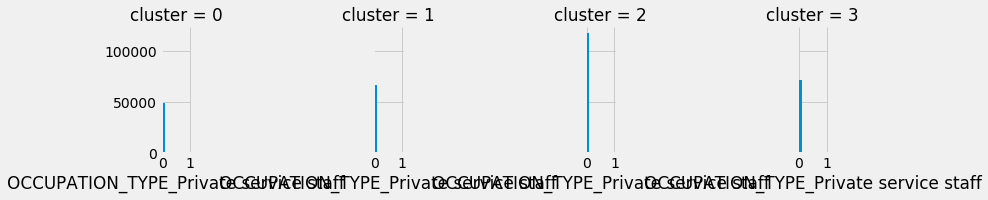

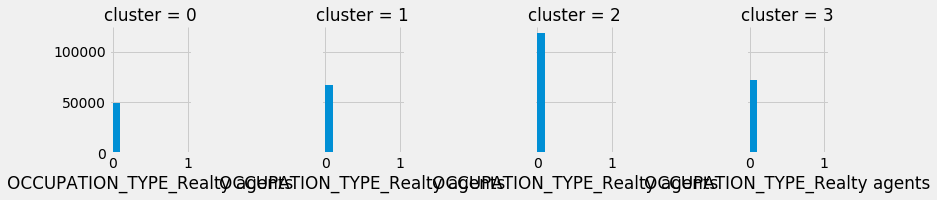

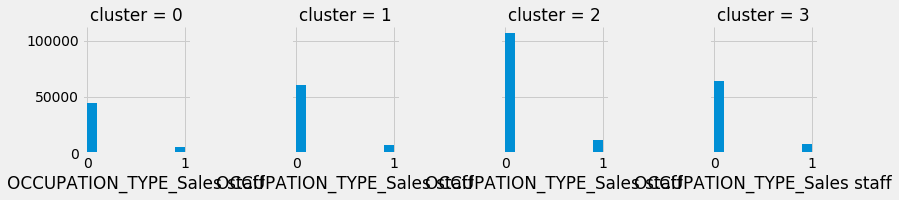

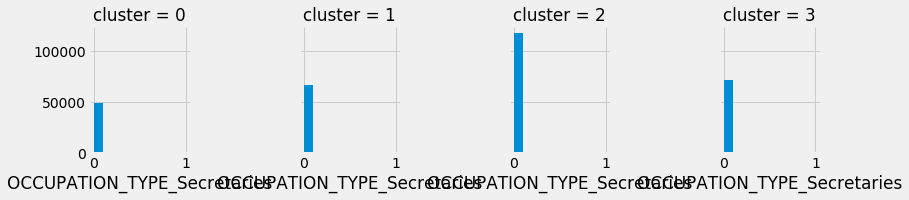

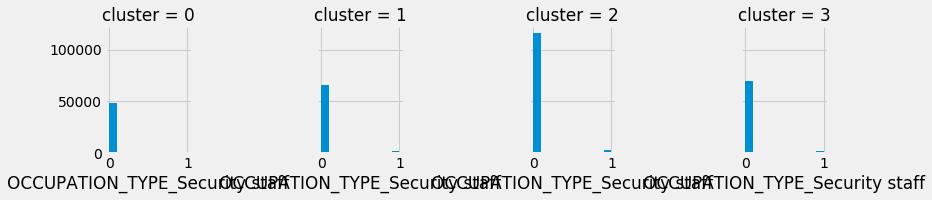

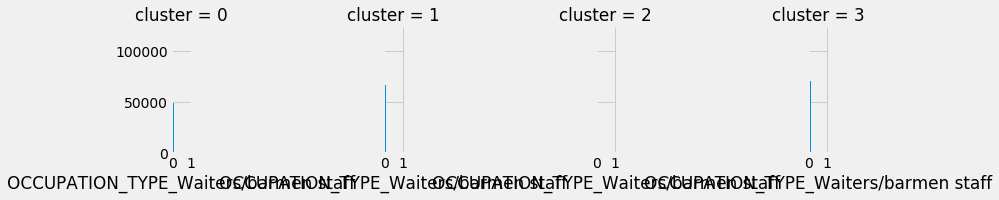

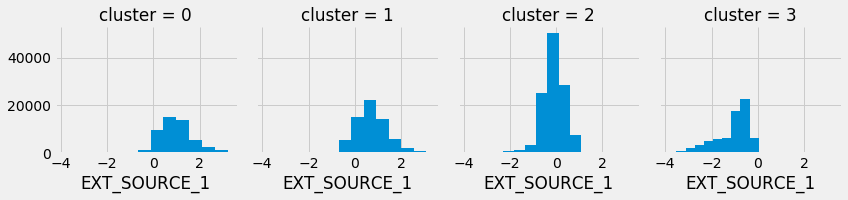

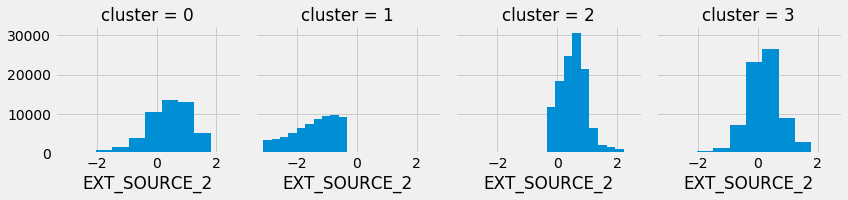

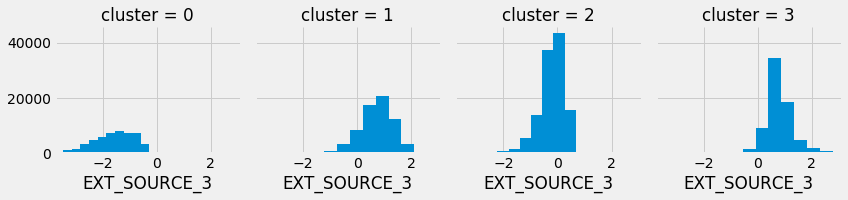

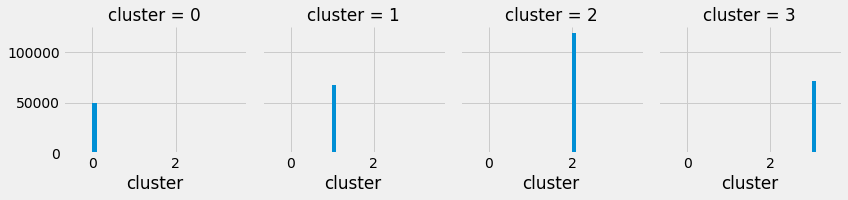

In [83]:
for c in df2:
    grid= sns.FacetGrid(df2, col='cluster')
    grid.map(plt.hist, c)

/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/mike/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:4

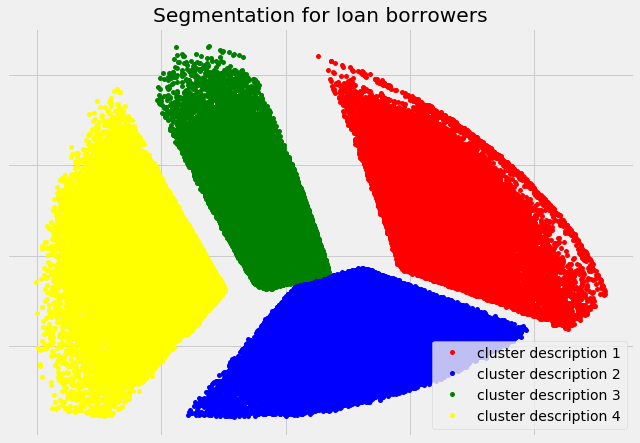

In [84]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df2)
X_PCA = pca.transform(df2)
X_PCA.shape

x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple',}

names = {0: 'cluster description 1', 
         1: 'cluster description 2', 
         2: 'cluster description 3', 
         3: 'cluster description 4', 
         4: 'cluster description 5',
         5: 'cluster description 6'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 7)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(loc='lower right')
ax.set_title("Segmentation for loan borrowers")
plt.savefig('payment_kmeans_cluster')

## Unsupervised Learning using Python

### Dimension Reductionality

In [171]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [257]:
len(X_train.columns.tolist())

22

In [258]:
from sklearn.decomposition import PCA

n_components = 22
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

In [259]:
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

In [260]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999999999998


In [261]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 30 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:29].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:39].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:100].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.99999998]
Variance Captured by First 20 Principal Components:  [1.]
Variance Captured by First 30 Principal Components:  [1.]
Variance Captured by First 100 Principal Components:  [1.]
Variance Captured by First 200 Principal Components:  [1.]


### K-means clustering

In [262]:
cols = X_train.columns.tolist()
from sklearn.preprocessing import Normalizer
int_X = transformer = Normalizer().fit_transform(X_train[cols])

int_X = pd.DataFrame(int_X, columns=cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

X_train = pd.DataFrame(scaled_data, columns=cols)

In [263]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters = 4
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 9
kmeans.fit(X_train_PCA.loc[:,0:cutoff])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=2, precompute_distances='auto',
       random_state=2018, tol=0.0001, verbose=0)

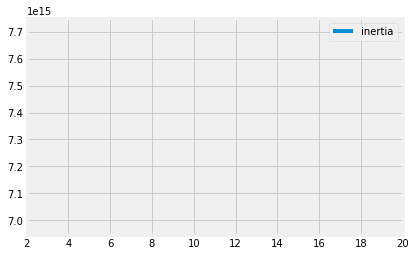

In [264]:
# Plot of kmeans inertia for every clusters
kMeans_inertia.plot()

In [265]:
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = \
        pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']
        
    preds = pd.concat([labelsDF,clusterDF], axis=1)
    preds.columns = ['trueLabel','cluster']
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
        
    countMostFreq = \
        pd.DataFrame(data=preds.groupby('cluster').agg( \
                        lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster, \
                        left_on="cluster",right_on="cluster")
    overallAccuracy = accuracyDF.countMostFrequent.sum()/ \
                        accuracyDF.clusterCount.sum()
    
    accuracyByLabel = accuracyDF.countMostFrequent/ \
                        accuracyDF.clusterCount
    
    return countByCluster, countByLabel, countMostFreq, \
            accuracyDF, overallAccuracy, accuracyByLabel

### Getting the label for the RFM segmentation, to be used in clustering

In [266]:
X_train.columns

Index(['MONTHS_BALANCE_POS_min', 'CNT_INSTALMENT_POS_max',
       'CNT_INSTALMENT_FUTURE_POS_max', 'CNT_INSTALMENT_FUTURE_POS_count',
       'NAME_CONTRACT_STATUS_POS_max', 'POS_PAYMENT_TYPE',
       'DAYS_INSTALMENT_INST_max', 'DAYS_ENTRY_PAYMENT_INST_max',
       'AMT_INSTALMENT_INST_max', 'AMT_PAYMENT_INST_max',
       'AMT_PAYMENT_INST_count', 'INST_PAYMENT_TYPE', 'AMT_BALANCE_CC_max',
       'AMT_CREDIT_LIMIT_ACTUAL_CC_mean', 'AMT_DRAWINGS_CURRENT_CC_mean',
       'AMT_DRAWINGS_CURRENT_CC_count', 'AMT_DRAWINGS_OTHER_CURRENT_CC_count',
       'AMT_INST_MIN_REGULARITY_CC_max', 'AMT_PAYMENT_TOTAL_CURRENT_CC_mean',
       'AMT_TOTAL_RECEIVABLE_CC_mean', 'CNT_DRAWINGS_CURRENT_CC_mean',
       'CC_PAYMENT_TYPE'],
      dtype='object')

In [267]:
freq_cols = ['CNT_INSTALMENT_POS_max', 'CNT_INSTALMENT_FUTURE_POS_max', 'CNT_INSTALMENT_FUTURE_POS_count', 'CNT_DRAWINGS_CURRENT_CC_mean', 'AMT_PAYMENT_INST_count', 'AMT_DRAWINGS_CURRENT_CC_count', 'AMT_DRAWINGS_OTHER_CURRENT_CC_count']
rec_cols = ['MONTHS_BALANCE_POS_min', 'DAYS_INSTALMENT_INST_max', 'DAYS_ENTRY_PAYMENT_INST_max']
mon_cols = ['AMT_INSTALMENT_INST_max', 'AMT_PAYMENT_INST_max', 'AMT_BALANCE_CC_max', 'AMT_CREDIT_LIMIT_ACTUAL_CC_mean', 'AMT_DRAWINGS_CURRENT_CC_mean', 'AMT_INST_MIN_REGULARITY_CC_max', 'AMT_PAYMENT_TOTAL_CURRENT_CC_mean', 'AMT_TOTAL_RECEIVABLE_CC_mean']

Use KBinsDiscretizer to segment the tiers of Recency, Frequency and Monetary features

In [268]:
from sklearn.preprocessing import KBinsDiscretizer

In [269]:
cols = freq_cols + rec_cols + mon_cols

est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
est.fit(X_train[cols])

X_train[cols] = est.transform(X_train[cols])

/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 12 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 14 are removed. Consider decreasing the number 

In [270]:
freq_cols = ['CNT_INSTALMENT_POS_max', 'CNT_INSTALMENT_FUTURE_POS_max', 'CNT_INSTALMENT_FUTURE_POS_count', 'CNT_DRAWINGS_CURRENT_CC_mean', 'AMT_PAYMENT_INST_count', 'AMT_DRAWINGS_CURRENT_CC_count', 'AMT_DRAWINGS_OTHER_CURRENT_CC_count']
rec_cols = ['MONTHS_BALANCE_POS_min', 'DAYS_INSTALMENT_INST_max', 'DAYS_ENTRY_PAYMENT_INST_max']
mon_cols = ['AMT_INSTALMENT_INST_max', 'AMT_PAYMENT_INST_max', 'AMT_BALANCE_CC_max', 'AMT_CREDIT_LIMIT_ACTUAL_CC_mean', 'AMT_DRAWINGS_CURRENT_CC_mean', 'AMT_INST_MIN_REGULARITY_CC_max', 'AMT_PAYMENT_TOTAL_CURRENT_CC_mean', 'AMT_TOTAL_RECEIVABLE_CC_mean']

In [271]:
X_train['frequency_score'] = X_train['CNT_INSTALMENT_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_count'] + X_train['CNT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_PAYMENT_INST_count'] + X_train['AMT_DRAWINGS_CURRENT_CC_count'] + X_train['AMT_DRAWINGS_OTHER_CURRENT_CC_count']
X_train['recency_score'] = X_train['MONTHS_BALANCE_POS_min'] + X_train['DAYS_INSTALMENT_INST_max'] + X_train['DAYS_ENTRY_PAYMENT_INST_max']
X_train['monetary_score'] = X_train['AMT_INSTALMENT_INST_max'] + X_train['AMT_PAYMENT_INST_max'] + X_train['AMT_BALANCE_CC_max'] + X_train['AMT_CREDIT_LIMIT_ACTUAL_CC_mean'] + X_train['AMT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_INST_MIN_REGULARITY_CC_max'] + X_train['AMT_PAYMENT_TOTAL_CURRENT_CC_mean'] + X_train['AMT_TOTAL_RECEIVABLE_CC_mean']

In [272]:
freq_score = X_train['CNT_INSTALMENT_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_max'] + X_train['CNT_INSTALMENT_FUTURE_POS_count'] + X_train['CNT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_PAYMENT_INST_count'] + X_train['AMT_DRAWINGS_CURRENT_CC_count'] + X_train['AMT_DRAWINGS_OTHER_CURRENT_CC_count']
rec_score = X_train['MONTHS_BALANCE_POS_min'] + X_train['DAYS_INSTALMENT_INST_max'] + X_train['DAYS_ENTRY_PAYMENT_INST_max']
mon_score = X_train['AMT_INSTALMENT_INST_max'] + X_train['AMT_PAYMENT_INST_max'] + X_train['AMT_BALANCE_CC_max'] + X_train['AMT_CREDIT_LIMIT_ACTUAL_CC_mean'] + X_train['AMT_DRAWINGS_CURRENT_CC_mean'] + X_train['AMT_INST_MIN_REGULARITY_CC_max'] + X_train['AMT_PAYMENT_TOTAL_CURRENT_CC_mean'] + X_train['AMT_TOTAL_RECEIVABLE_CC_mean']

In [213]:
cols = ['frequency_score', 'recency_score', 'monetary_score']

est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
est.fit(X_train[cols])

X_train[cols] = est.transform(X_train[cols])

In [214]:
X_train[cols] = X_train[cols].astype('int')

In [215]:
# DON'T RUN THIS CODE 
#if X_train['frequency_score'] == 4 & X_train['recency_score'] == 4 & X_train['monetary_score'] == 4:
#    X_train['label'] = 0
#elif X_train['frequency_score'] == 4 & X_train['recency_score'] == 1 & (X_train['monetary_score'] == 4 | X_train['monetary_score'] == 3):
#    X_train['label'] = 1
#elif X_train['frequency_score'] == 4 & X_train['recency_score'] == 4 & (X_train['monetary_score'] == 4 | X_train['monetary_score'] == 3):
#    X_train['label'] = 2
#elif X_train['frequency_score'] == 1 & (X_train['recency_score'] == 4 | X_train['recency_score'] == 3) & (X_train['monetary_score'] == 4 | X_train['monetary_score'] == 3):
#    X_train['label'] = 3
#else:
#    X_train['label'] = 4

### TRY: RFM label is equals to RFM score

In [273]:
X_train['label'] = X_train['frequency_score'] + X_train['recency_score'] + X_train['monetary_score']

In [274]:
rfm_cols = ['frequency_score', 'recency_score', 'monetary_score', 'label']
X_train[rfm_cols].min()

frequency_score    0.0
recency_score      0.0
monetary_score     3.0
label              5.0
dtype: float64

In [275]:
y_train = X_train['label']
X_train = X_train.drop(columns=['label'])

In [276]:
cols = X_train.columns.tolist()
from sklearn.preprocessing import Normalizer
int_X = Normalizer().fit_transform(X_train[cols])

int_X = pd.DataFrame(int_X, columns=cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

X_train = pd.DataFrame(scaled_data, columns=cols)

In [277]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2


kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 9
kmeans.fit(X_train_PCA.loc[:,0:cutoff])
#kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    
# Plot of kmeans inertia for every clusters
#kMeans_inertia.plot()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=2, precompute_distances='auto',
       random_state=2018, tol=0.0001, verbose=0)

In [278]:
# K-means - Accuracy as the number of clusters varies

n_clusters = 4
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = \
    pd.DataFrame(data=[],index=range(2,21),columns=['inertia'])
overallAccuracy_kMeansDF = \
    pd.DataFrame(data=[],index=range(2,21),columns=['overallAccuracy'])

#for n_clusters in range(2,21):
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 99
kmeans.fit(X_train_PCA.loc[:,0:cutoff])
kMeans_inertia.loc[n_clusters] = kmeans.inertia_
X_train_kmeansClustered = kmeans.predict(X_train_PCA.loc[:,0:cutoff])
X_train_kmeansClustered = \
    pd.DataFrame(data=X_train_kmeansClustered, index=X_train.index, \
                     columns=['cluster'])
    
countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, \
    accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans \
    = analyzeCluster(X_train_kmeansClustered, y_train)
    
overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans

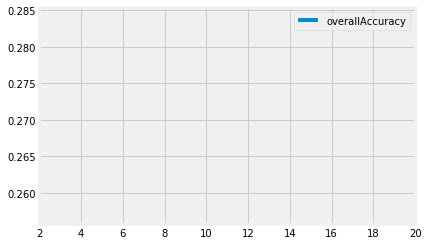

In [82]:
overallAccuracy_kMeansDF.plot()

In [222]:
accuracyByLabel_kMeans

0    0.212716
1    0.329685
2    0.705951
3    0.264378
dtype: float64

Low accuracy because labels are not yet super defined

### Hierarchical Clustering

In [223]:
#!pip install fastcluster
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist

cutoff = 9
Z = fastcluster.linkage_vector(X_train_PCA.loc[:,0:cutoff], \
                               method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
    columns=['clusterOne','clusterTwo','distance','newClusterSize'])

KeyboardInterrupt: 

In [91]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 50000000
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = \
    pd.DataFrame(data=clusters,index=X_train_PCA.index,columns=['cluster'])

In [92]:
print("Number of distinct clusters: ", \
      len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  4


In [93]:
countByCluster_hierClust, countByLabel_hierClust, \
    countMostFreq_hierClust, accuracyDF_hierClust, \
    overallAccuracy_hierClust, accuracyByLabel_hierClust \
    = analyzeCluster(X_train_hierClustered, y_train)

print("Overall accuracy from hierarchical clustering: ", \
      overallAccuracy_hierClust)


Overall accuracy from hierarchical clustering:  0.17017488914896073


In [94]:
print("Accuracy by cluster for hierarchical clustering")
accuracyByLabel_hierClust

Accuracy by cluster for hierarchical clustering


0    0.172543
1    0.166775
2    0.170493
3    0.170606
dtype: float64

### HDBScan

In [95]:
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, 
            n_jobs=n_jobs)

cutoff = 9
X_train_PCA_dbscanClustered = db.fit_predict(X_train_PCA.loc[:,0:cutoff])
X_train_PCA_dbscanClustered = \
    pd.DataFrame(data=X_train_PCA_dbscanClustered, index=X_train.index, \
                 columns=['cluster'])

countByCluster_dbscan, countByLabel_dbscan, countMostFreq_dbscan, \
    accuracyDF_dbscan, overallAccuracy_dbscan, accuracyByLabel_dbscan \
    = analyzeCluster(X_train_PCA_dbscanClustered, y_train)

overallAccuracy_dbscan

0.21247960176042988

In [96]:
print("Overall accuracy from DBSCAN: ",overallAccuracy_dbscan)

Overall accuracy from DBSCAN:  0.21247960176042988


In [97]:
print("Cluster results for DBSCAN")
countByCluster_dbscan

Cluster results for DBSCAN


,cluster,clusterCount
0,-1,121334


In [98]:
X.head()

,MONTHS_BALANCE_POS_min,CNT_INSTALMENT_POS_max,CNT_INSTALMENT_FUTURE_POS_max,CNT_INSTALMENT_FUTURE_POS_count,NAME_CONTRACT_STATUS_POS_max,POS_PAYMENT_TYPE,DAYS_INSTALMENT_INST_max,DAYS_ENTRY_PAYMENT_INST_max,AMT_INSTALMENT_INST_max,AMT_PAYMENT_INST_max,AMT_PAYMENT_INST_count,INST_PAYMENT_TYPE,AMT_BALANCE_CC_max,AMT_CREDIT_LIMIT_ACTUAL_CC_mean,AMT_DRAWINGS_CURRENT_CC_mean,AMT_DRAWINGS_CURRENT_CC_count,AMT_DRAWINGS_OTHER_CURRENT_CC_count,AMT_INST_MIN_REGULARITY_CC_max,AMT_PAYMENT_TOTAL_CURRENT_CC_mean,AMT_TOTAL_RECEIVABLE_CC_mean,CNT_DRAWINGS_CURRENT_CC_mean,CC_PAYMENT_TYPE
0,-19,24.0,24.0,19,0,1,-25.0,-49.0,53093.745,53093.745,19,1,0.0,270000.000000,0.000000,6,0,0.0,0.000000,0.000000,0.000000,1
1,-77,12.0,12.0,28,0,1,-536.0,-544.0,560835.360,560835.360,25,1,189000.0,164189.189189,2432.432432,74,74,9000.0,4520.067568,54433.179122,0.054054,1
2,-27,4.0,4.0,4,0,1,-724.0,-727.0,10573.965,10573.965,3,1,0.0,675000.000000,0.000000,17,0,0.0,0.000000,0.000000,0.000000,1
3,-20,48.0,48.0,20,0,1,-11.0,-12.0,691786.890,691786.890,16,1,0.0,135000.000000,0.000000,8,0,0.0,0.000000,0.000000,0.000000,1
4,-77,24.0,24.0,66,0,1,-14.0,-14.0,22678.785,22678.785,66,1,0.0,78750.000000,0.000000,12,0,0.0,0.000000,0.000000,0.000000,1


### Discovering the demographics for the RFM label

In [279]:
current.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [281]:
y_train = pd.DataFrame(y_train)

In [282]:
df = y_train.merge(current, how='outer', left_index=True, right_index=True)
df = df[pd.notnull(df['label'])]
print(df.shape)
df.head()

(121334, 123)


,label,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,11.0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,32.0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [283]:
y_train = df['label']
X_train = df.drop(columns=['label'])

In [284]:
cols = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
X = X_train[cols]

In [285]:
freq_score = pd.DataFrame(freq_score, columns=['freq_score'])
rec_score = pd.DataFrame(rec_score, columns=['rec_score'])
mon_score = pd.DataFrame(mon_score, columns=['mon_score'])

In [287]:
X = pd.concat([X, freq_score, rec_score, mon_score], axis=1)

In [290]:
X.columns

Index(['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'freq_score', 'rec_score', 'mon_score'],
      dtype='object')

In [291]:
label_X = X.select_dtypes(include=['object'])
int_X = X.select_dtypes(exclude=['object'])

cols = label_X.columns.tolist()
label_X = pd.get_dummies(label_X, columns=cols)

In [292]:
from sklearn.impute import SimpleImputer
# use for loop for SimpleImputer
cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

for col in cols:
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(X[[col]])

    imp_mean.transform(X[[col]])
    X[col] = imp_mean.transform(X[[col]]).flatten()
    print(col)

EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3


In [293]:
label_X.isnull().sum()

CODE_GENDER_F                              0
CODE_GENDER_M                              0
CODE_GENDER_XNA                            0
NAME_INCOME_TYPE_Businessman               0
NAME_INCOME_TYPE_Commercial associate      0
NAME_INCOME_TYPE_Maternity leave           0
NAME_INCOME_TYPE_Pensioner                 0
NAME_INCOME_TYPE_State servant             0
NAME_INCOME_TYPE_Student                   0
NAME_INCOME_TYPE_Unemployed                0
NAME_INCOME_TYPE_Working                   0
NAME_FAMILY_STATUS_Civil marriage          0
NAME_FAMILY_STATUS_Married                 0
NAME_FAMILY_STATUS_Separated               0
NAME_FAMILY_STATUS_Single / not married    0
NAME_FAMILY_STATUS_Unknown                 0
NAME_FAMILY_STATUS_Widow                   0
NAME_HOUSING_TYPE_Co-op apartment          0
NAME_HOUSING_TYPE_House / apartment        0
NAME_HOUSING_TYPE_Municipal apartment      0
NAME_HOUSING_TYPE_Office apartment         0
NAME_HOUSING_TYPE_Rented apartment         0
NAME_HOUSI

In [296]:
scaled_data.isnull().sum()

EXT_SOURCE_1    0
EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64

In [297]:
cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'freq_score', 'rec_score', 'mon_score']

In [298]:
from sklearn.preprocessing import Normalizer
int_X = transformer = Normalizer().fit_transform(X[cols])

int_X = pd.DataFrame(int_X, columns=cols)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(int_X[cols])

scaled_data = pd.DataFrame(scaled_data, columns=cols)

X_train = pd.concat([label_X, scaled_data], axis=1)

In [299]:
X_train = pd.concat([label_X, scaled_data], axis=1)
X_train.shape

(121334, 47)

In [300]:
X_train.isnull().sum()

CODE_GENDER_F                              0
CODE_GENDER_M                              0
CODE_GENDER_XNA                            0
NAME_INCOME_TYPE_Businessman               0
NAME_INCOME_TYPE_Commercial associate      0
NAME_INCOME_TYPE_Maternity leave           0
NAME_INCOME_TYPE_Pensioner                 0
NAME_INCOME_TYPE_State servant             0
NAME_INCOME_TYPE_Student                   0
NAME_INCOME_TYPE_Unemployed                0
NAME_INCOME_TYPE_Working                   0
NAME_FAMILY_STATUS_Civil marriage          0
NAME_FAMILY_STATUS_Married                 0
NAME_FAMILY_STATUS_Separated               0
NAME_FAMILY_STATUS_Single / not married    0
NAME_FAMILY_STATUS_Unknown                 0
NAME_FAMILY_STATUS_Widow                   0
NAME_HOUSING_TYPE_Co-op apartment          0
NAME_HOUSING_TYPE_House / apartment        0
NAME_HOUSING_TYPE_Municipal apartment      0
NAME_HOUSING_TYPE_Office apartment         0
NAME_HOUSING_TYPE_Rented apartment         0
NAME_HOUSI

In [301]:
X_train = X_train.dropna()

Implement PCA first

In [302]:
len(X_train.columns.tolist())

47

In [303]:
from sklearn.decomposition import PCA

n_components = 47
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 30 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:29].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:39].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:100].sum(axis=1).values)

Variance Explained by all 784 principal components:  0.9999999999999998
Variance Captured by First 10 Principal Components:  [0.87699705]
Variance Captured by First 20 Principal Components:  [0.97214711]
Variance Captured by First 30 Principal Components:  [0.99711039]
Variance Captured by First 100 Principal Components:  [0.99999229]
Variance Captured by First 200 Principal Components:  [1.]


In [304]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters = 4
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

#kMeans_inertia = pd.DataFrame(data=[],index=range(2,21), \
#                              columns=['inertia'])
#for n_clusters in range(2,21):
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 9
kmeans.fit(X_train_PCA.loc[:,0:cutoff])
#kMeans_inertia.loc[n_clusters] = kmeans.inertia_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=2, precompute_distances='auto',
       random_state=2018, tol=0.0001, verbose=0)

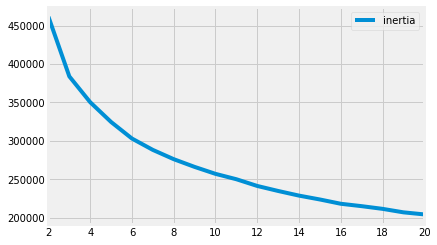

In [134]:
kMeans_inertia.plot()

In [305]:
# K-means - Accuracy as the number of clusters varies

n_clusters = 4
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = \
    pd.DataFrame(data=[],index=range(2,21),columns=['inertia'])
overallAccuracy_kMeansDF = \
    pd.DataFrame(data=[],index=range(2,21),columns=['overallAccuracy'])

#for n_clusters in range(2,21):
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
            max_iter=max_iter, tol=tol, random_state=random_state, \
            n_jobs=n_jobs)

cutoff = 99
kmeans.fit(X_train_PCA.loc[:,0:cutoff])
kMeans_inertia.loc[n_clusters] = kmeans.inertia_
X_train_kmeansClustered = kmeans.predict(X_train_PCA.loc[:,0:cutoff])
X_train_kmeansClustered = \
    pd.DataFrame(data=X_train_kmeansClustered, index=X_train.index, \
                     columns=['cluster'])
    
countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, \
    accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans \
    = analyzeCluster(X_train_kmeansClustered, y_train)
    
overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans

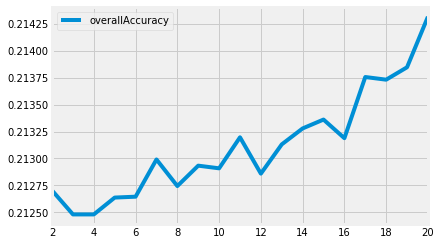

In [137]:
overallAccuracy_kMeansDF.plot()

In [306]:
accuracyByLabel_kMeans

0    0.082965
1    0.082431
2    0.111081
3    0.114745
dtype: float64

In [307]:
X_train_kmeansClustered.head()

,cluster
0,0
1,1
2,3
3,1
4,3


In [308]:
X.head()

,CODE_GENDER,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,freq_score,rec_score,mon_score
0,M,Working,Single / not married,House / apartment,Laborers,0.083037,0.262949,0.139376,0.0,4.0,7.0
1,F,State servant,Married,House / apartment,Core staff,0.311267,0.622246,0.510266,14.0,8.0,10.0
2,M,Working,Single / not married,House / apartment,Laborers,0.502491,0.555912,0.729567,8.0,7.0,8.0
3,F,Working,Civil marriage,House / apartment,Laborers,0.502491,0.650442,0.510266,13.0,2.0,9.0
4,M,Working,Single / not married,House / apartment,Core staff,0.502491,0.322738,0.510266,6.0,5.0,7.0


In [309]:
df = X_train_kmeansClustered.merge(X, how='outer', left_index=True, right_index=True)
df = df[pd.notnull(df['cluster'])]
print(df.shape)
df.head()

(121334, 12)


,cluster,CODE_GENDER,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,freq_score,rec_score,mon_score
0,0,M,Working,Single / not married,House / apartment,Laborers,0.083037,0.262949,0.139376,0.0,4.0,7.0
1,1,F,State servant,Married,House / apartment,Core staff,0.311267,0.622246,0.510266,14.0,8.0,10.0
2,3,M,Working,Single / not married,House / apartment,Laborers,0.502491,0.555912,0.729567,8.0,7.0,8.0
3,1,F,Working,Civil marriage,House / apartment,Laborers,0.502491,0.650442,0.510266,13.0,2.0,9.0
4,3,M,Working,Single / not married,House / apartment,Core staff,0.502491,0.322738,0.510266,6.0,5.0,7.0


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121334 entries, 0 to 121333
Data columns (total 12 columns):
cluster               121334 non-null int32
CODE_GENDER           121334 non-null object
NAME_INCOME_TYPE      121334 non-null object
NAME_FAMILY_STATUS    121334 non-null object
NAME_HOUSING_TYPE     121334 non-null object
OCCUPATION_TYPE       83305 non-null object
EXT_SOURCE_1          121334 non-null float64
EXT_SOURCE_2          121334 non-null float64
EXT_SOURCE_3          121334 non-null float64
freq_score            121334 non-null float64
rec_score             121334 non-null float64
mon_score             121334 non-null float64
dtypes: float64(6), int32(1), object(5)
memory usage: 11.6+ MB


In [311]:
df2 = df.select_dtypes(include=['float', 'int32'])
df3 = df.select_dtypes(exclude='float')

In [165]:
df.groupby('cluster')['CODE_GENDER'].value_counts()

cluster  CODE_GENDER
0        F              17524
         M               7993
         XNA                1
1        F              19304
         M               7175
         XNA                2
2        F              43102
3        M              26226
         F                  7
Name: CODE_GENDER, dtype: int64

In [166]:
df.groupby('cluster')['NAME_INCOME_TYPE'].value_counts()

cluster  NAME_INCOME_TYPE    
0        Working                 13408
         Pensioner                6085
         Commercial associate     4477
         State servant            1544
         Student                     2
         Unemployed                  2
1        Working                 13457
         Commercial associate     6989
         Pensioner                3977
         State servant            2052
         Maternity leave             2
         Unemployed                  2
         Businessman                 1
         Student                     1
2        Working                 20490
         Commercial associate     9779
         Pensioner                9446
         State servant            3379
         Unemployed                  6
         Student                     2
3        Working                 15527
         Commercial associate     6927
         Pensioner                2247
         State servant            1523
         Student                  

In [167]:
df.groupby('cluster')['NAME_FAMILY_STATUS'].value_counts()

cluster  NAME_FAMILY_STATUS  
0        Married                 15771
         Single / not married     3884
         Civil marriage           2714
         Widow                    1614
         Separated                1535
1        Married                 17298
         Single / not married     3632
         Civil marriage           2361
         Separated                1843
         Widow                    1347
2        Married                 25834
         Single / not married     6186
         Civil marriage           4583
         Separated                3302
         Widow                    3197
3        Married                 18739
         Single / not married     4025
         Civil marriage           2207
         Separated                1046
         Widow                     215
         Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64

In [168]:
df.groupby('cluster')['NAME_HOUSING_TYPE'].value_counts()

cluster  NAME_HOUSING_TYPE  
0        House / apartment      22619
         With parents            1305
         Municipal apartment      878
         Rented apartment         405
         Office apartment         227
         Co-op apartment           84
1        House / apartment      23655
         With parents            1179
         Municipal apartment      980
         Rented apartment         361
         Office apartment         214
         Co-op apartment           92
2        House / apartment      38627
         With parents            1728
         Municipal apartment     1720
         Rented apartment         565
         Office apartment         322
         Co-op apartment          140
3        House / apartment      22851
         With parents            1647
         Municipal apartment      823
         Rented apartment         527
         Office apartment         269
         Co-op apartment          116
Name: NAME_HOUSING_TYPE, dtype: int64

In [169]:
df.groupby('cluster')['OCCUPATION_TYPE'].value_counts()

cluster  OCCUPATION_TYPE      
0        Laborers                 4663
         Sales staff              2754
         Core staff               1940
         Drivers                  1312
         Managers                 1154
         High skill tech staff     712
         Medicine staff            644
         Accountants               643
         Security staff            630
         Cooking staff             617
         Cleaning staff            492
         Low-skill Laborers        259
         Private service staff     154
         Waiters/barmen staff      118
         Secretaries                92
         Realty agents              43
         HR staff                   32
         IT staff                   30
1        Laborers                 3954
         Core staff               2806
         Sales staff              2648
         Managers                 2498
         Drivers                  1288
         Accountants              1200
         High skill tech staff   

/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mike/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


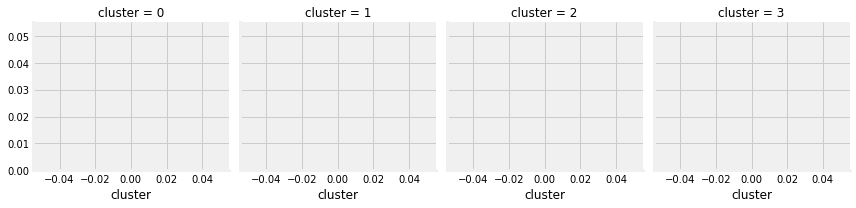

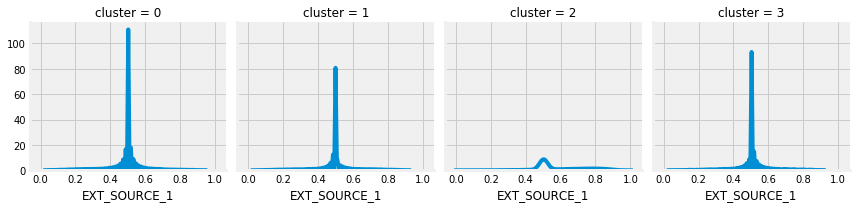

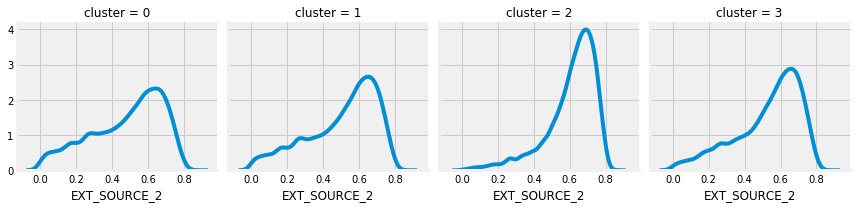

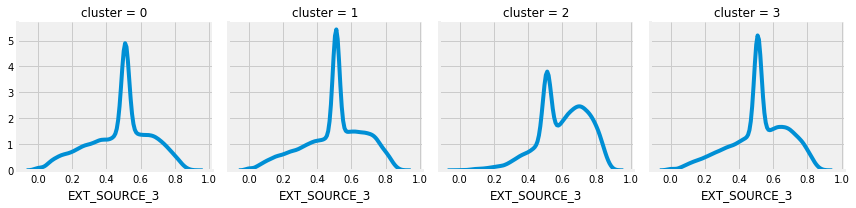

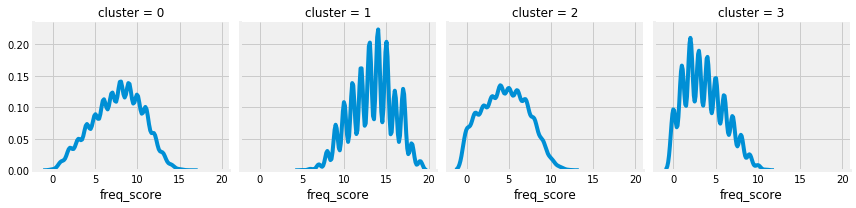

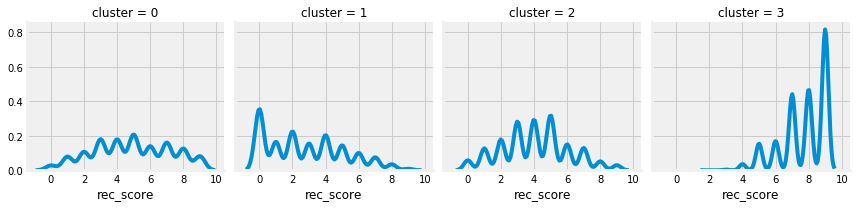

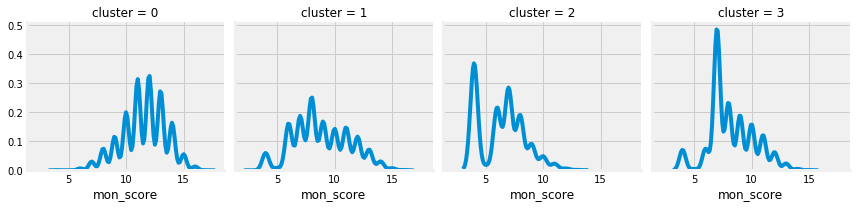

In [312]:
import seaborn as sns

for c in df2:
    grid= sns.FacetGrid(df2, col='cluster')
    grid.map(sns.kdeplot, c)

In [313]:
df.groupby('cluster')[['freq_score', 'rec_score', 'mon_score']].median()

,freq_score,rec_score,mon_score
cluster,,,
0,8.0,5.0,12.0
1,14.0,2.0,9.0
2,5.0,4.0,7.0
3,3.0,8.0,8.0


### Hierarchical clustering

In [122]:
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist

cutoff = 9
Z = fastcluster.linkage_vector(X_train_PCA.loc[:,0:cutoff], \
                               method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
    columns=['clusterOne','clusterTwo','distance','newClusterSize'])

KeyboardInterrupt: 

In [ ]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 160
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = \
    pd.DataFrame(data=clusters,index=X_train_PCA.index,columns=['cluster'])

In [ ]:
print("Number of distinct clusters: ", \
      len(X_train_hierClustered['cluster'].unique()))

In [ ]:
countByCluster_hierClust, countByLabel_hierClust, \
    countMostFreq_hierClust, accuracyDF_hierClust, \
    overallAccuracy_hierClust, accuracyByLabel_hierClust \
    = analyzeCluster(X_train_hierClustered, y_train)

print("Overall accuracy from hierarchical clustering: ", \
      overallAccuracy_hierClust)

In [ ]:
print("Accuracy by cluster for hierarchical clustering")
accuracyByLabel_hierClust

### DBScan

In [ ]:
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, 
            n_jobs=n_jobs)

cutoff = 9
X_train_PCA_dbscanClustered = db.fit_predict(X_train_PCA.loc[:,0:cutoff])
X_train_PCA_dbscanClustered = \
    pd.DataFrame(data=X_train_PCA_dbscanClustered, index=X_train.index, \
                 columns=['cluster'])

countByCluster_dbscan, countByLabel_dbscan, countMostFreq_dbscan, \
    accuracyDF_dbscan, overallAccuracy_dbscan, accuracyByLabel_dbscan \
    = analyzeCluster(X_train_PCA_dbscanClustered, y_train)

overallAccuracy_dbscan

In [ ]:
print("Overall accuracy from DBSCAN: ",overallAccuracy_dbscan)

In [ ]:
print("Cluster results for DBSCAN")
countByCluster_dbscan